<a href="https://colab.research.google.com/github/2303A52073/explainable-AI-2073/blob/main/Research_Paper_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.EDA

2.Preprocessing

3.Training models

4.Ensembling


Dataset Shape: (100000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27

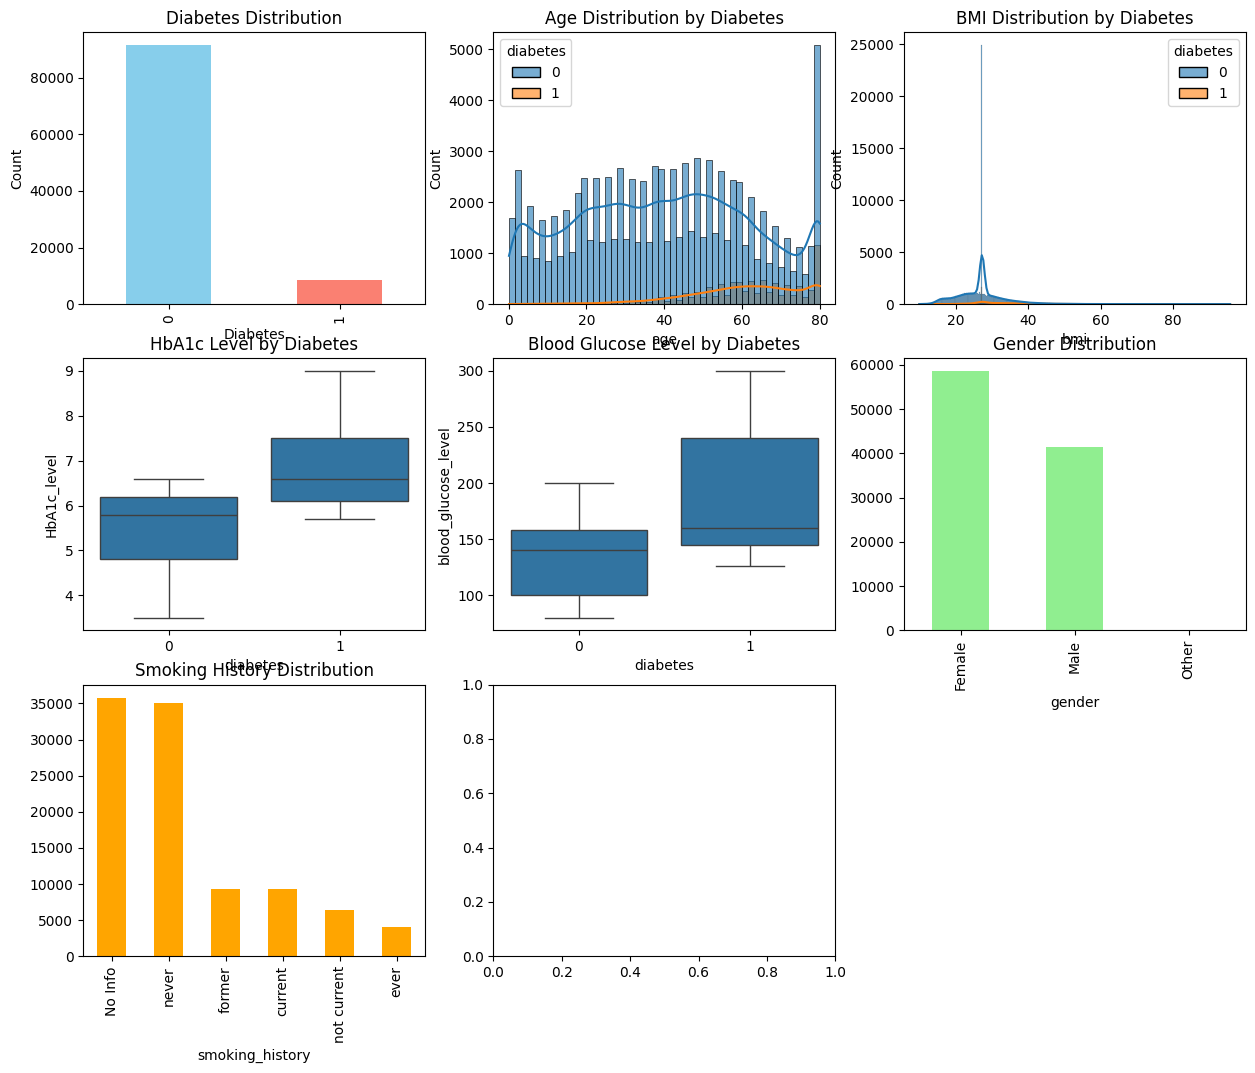

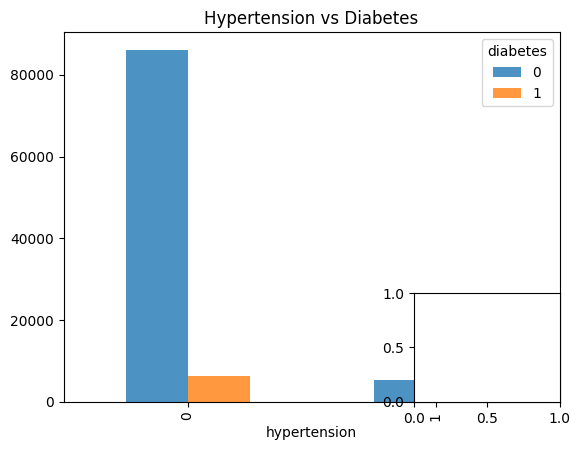

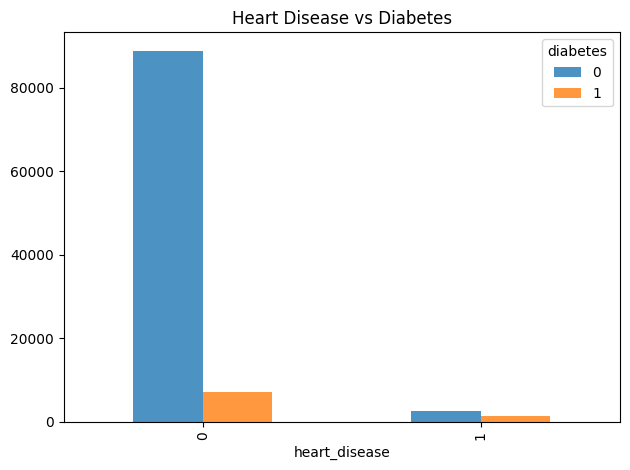

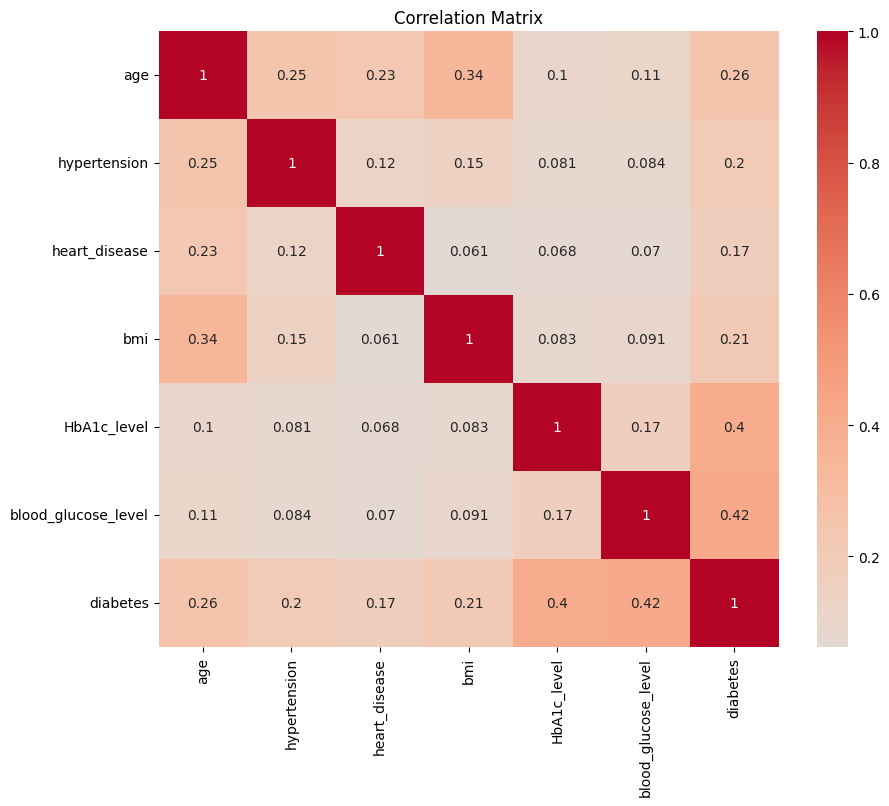


DATA PREPROCESSING
Original categorical variables:
Gender unique values: ['Female' 'Male' 'Other']
Smoking history unique values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

After encoding:
Gender encoded: [0 1 2]
Smoking history encoded: [0 1 5 2 4 3]

Missing values after encoding: 0

Training set size: (80000, 8)
Test set size: (20000, 8)
Training set diabetes percentage: 8.50%
Test set diabetes percentage: 8.50%

Preprocessing completed successfully!

MODEL TRAINING AND EVALUATION

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9605, AUC: 0.9617

Training Random Forest...
Random Forest - Accuracy: 0.9701, AUC: 0.9638

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9722, AUC: 0.9794

Training SVM...
SVM - Accuracy: 0.9642, AUC: 0.9347

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9613, AUC: 0.9036

Training Decision Tree...
Decision Tree - Accuracy: 0.9526, AUC: 0.8571

Model Performance Summary:
              

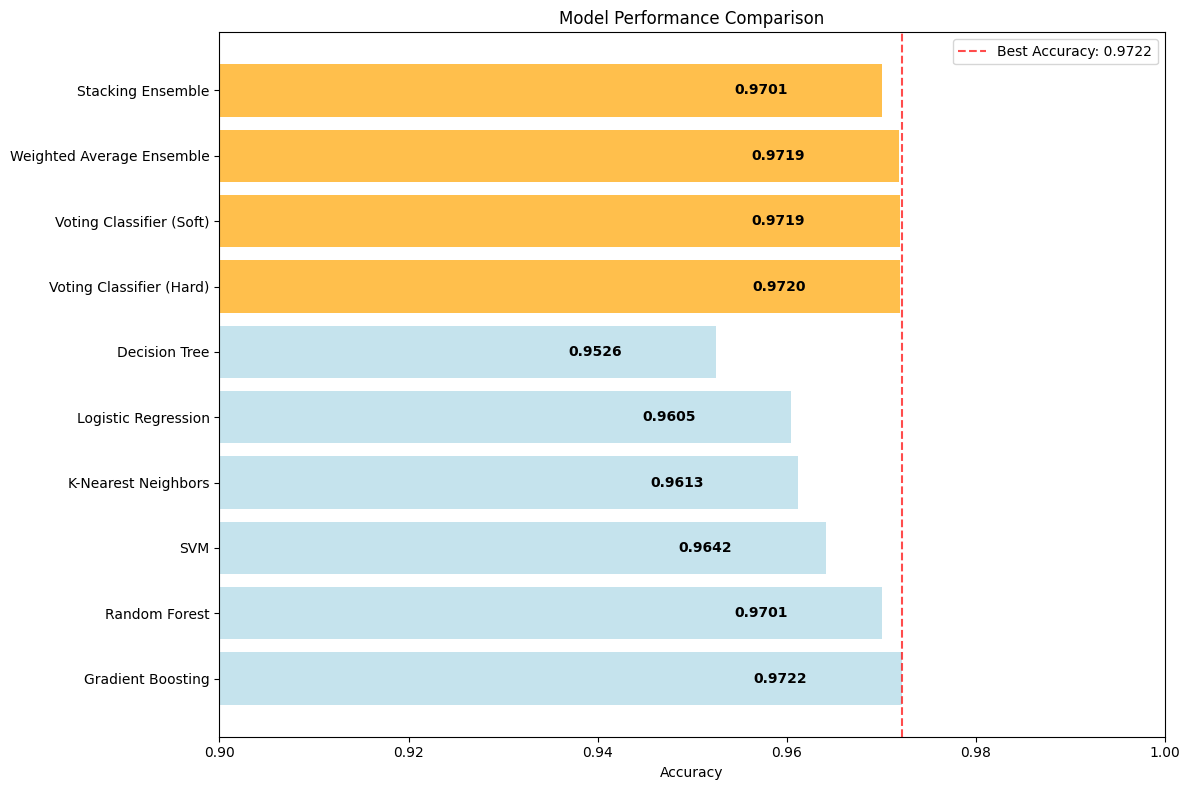


Best Individual Model: Gradient Boosting

🎯 BEST OVERALL MODEL: Gradient Boosting
🏆 BEST ACCURACY: 0.9722


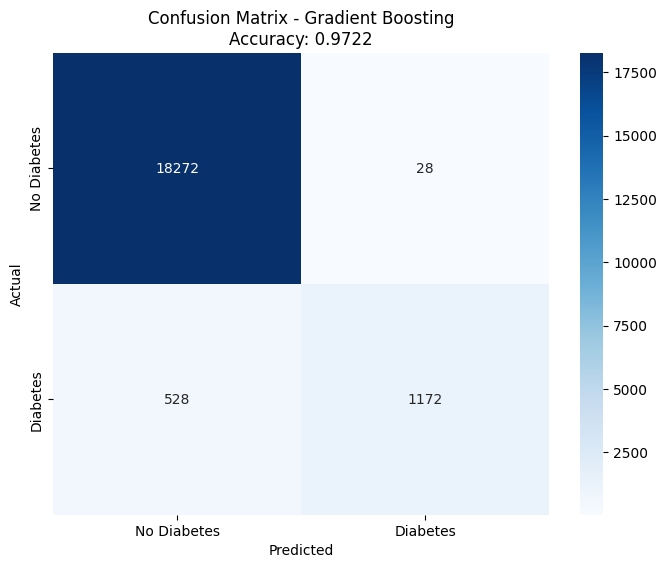


ANALYSIS COMPLETED SUCCESSFULLY!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# =============================================================================
# 1. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Target variable distribution
print("\nTarget Variable Distribution:")
print(df['diabetes'].value_counts())
print(f"\nDiabetes Percentage: {df['diabetes'].mean():.2%}")

# Visualizations
plt.figure(figsize=(15, 12))

# 1. Target distribution
plt.subplot(3, 3, 1)
df['diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# 2. Age distribution by diabetes
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='age', hue='diabetes', kde=True, alpha=0.6)
plt.title('Age Distribution by Diabetes')

# 3. BMI distribution by diabetes
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='bmi', hue='diabetes', kde=True, alpha=0.6)
plt.title('BMI Distribution by Diabetes')

# 4. HbA1c level by diabetes
plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='diabetes', y='HbA1c_level')
plt.title('HbA1c Level by Diabetes')

# 5. Blood glucose level by diabetes
plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Level by Diabetes')

# 6. Gender distribution
plt.subplot(3, 3, 6)
df['gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')

# 7. Smoking history
plt.subplot(3, 3, 7)
df['smoking_history'].value_counts().plot(kind='bar', color='orange')
plt.title('Smoking History Distribution')

# 8. Hypertension by diabetes
plt.subplot(3, 3, 8)
pd.crosstab(df['hypertension'], df['diabetes']).plot(kind='bar', alpha=0.8)
plt.title('Hypertension vs Diabetes')

# 9. Heart disease by diabetes
plt.subplot(3, 3, 9)
pd.crosstab(df['heart_disease'], df['diabetes']).plot(kind='bar', alpha=0.8)
plt.title('Heart Disease vs Diabetes')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# =============================================================================
# 2. DATA PREPROCESSING
# =============================================================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Handle categorical variables
print("Original categorical variables:")
print(f"Gender unique values: {df_processed['gender'].unique()}")
print(f"Smoking history unique values: {df_processed['smoking_history'].unique()}")

# Encode gender (binary)
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df_processed['gender'] = df_processed['gender'].map(gender_mapping)

# Handle smoking history (ordinal encoding based on smoking intensity)
smoking_mapping = {
    'never': 0,
    'No Info': 1,
    'former': 2,
    'not current': 3,
    'ever': 4,
    'current': 5
}
df_processed['smoking_history'] = df_processed['smoking_history'].map(smoking_mapping)

print("\nAfter encoding:")
print(f"Gender encoded: {df_processed['gender'].unique()}")
print(f"Smoking history encoded: {df_processed['smoking_history'].unique()}")

# Check for any missing values after encoding
print(f"\nMissing values after encoding: {df_processed.isnull().sum().sum()}")

# Handle outliers in numerical columns (cap at 1st and 99th percentiles)
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.01)
    Q3 = df_processed[col].quantile(0.99)
    df_processed[col] = np.clip(df_processed[col], Q1, Q3)

# Prepare features and target
X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set diabetes percentage: {y_train.mean():.2%}")
print(f"Test set diabetes percentage: {y_test.mean():.2%}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing completed successfully!")

# =============================================================================
# 3. MODEL TRAINING AND EVALUATION
# =============================================================================

print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION")
print("="*50)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    if name in ['SVM', 'K-Nearest Neighbors', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")

# Display results in a dataframe
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'AUC Score': [results[model]['auc_score'] for model in results]
}).sort_values('Accuracy', ascending=False)

print("\nModel Performance Summary:")
print(results_df)

# =============================================================================
# 4. ENSEMBLE METHODS
# =============================================================================

print("\n" + "="*50)
print("ENSEMBLE METHODS")
print("="*50)

# Create ensemble models
ensemble_results = {}

# 1. Voting Classifier (Hard Voting)
print("\n1. Training Voting Classifier (Hard Voting)...")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('lr', LogisticRegression(random_state=42, max_iter=1000))
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
ensemble_results['Voting Classifier (Hard)'] = accuracy_voting
print(f"Voting Classifier (Hard) Accuracy: {accuracy_voting:.4f}")

# 2. Voting Classifier (Soft Voting)
print("\n2. Training Voting Classifier (Soft Voting)...")
voting_clf_soft = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('lr', LogisticRegression(random_state=42, max_iter=1000))
    ],
    voting='soft'
)
voting_clf_soft.fit(X_train, y_train)
y_pred_voting_soft = voting_clf_soft.predict(X_test)
accuracy_voting_soft = accuracy_score(y_test, y_pred_voting_soft)
ensemble_results['Voting Classifier (Soft)'] = accuracy_voting_soft
print(f"Voting Classifier (Soft) Accuracy: {accuracy_voting_soft:.4f}")

# 3. Weighted Average Ensemble
print("\n3. Creating Weighted Average Ensemble...")
# Get probabilities from top 3 models
top_models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
probabilities = []

for model_name in top_models:
    if model_name in ['Logistic Regression']:
        model_temp = LogisticRegression(random_state=42, max_iter=1000)
        model_temp.fit(X_train_scaled, y_train)
        proba = model_temp.predict_proba(X_test_scaled)[:, 1]
    else:
        proba = results[model_name]['probabilities']
    probabilities.append(proba)

# Weighted average (weights based on individual model performance)
weights = [results[model]['accuracy'] for model in top_models]
weights = [w/sum(weights) for w in weights]  # Normalize weights

weighted_avg_proba = sum(w * p for w, p in zip(weights, probabilities))
weighted_avg_pred = (weighted_avg_proba > 0.5).astype(int)
accuracy_weighted = accuracy_score(y_test, weighted_avg_pred)
ensemble_results['Weighted Average Ensemble'] = accuracy_weighted
print(f"Weighted Average Ensemble Accuracy: {accuracy_weighted:.4f}")

# 4. Stacking Ensemble (using predictions as features for meta-model)
print("\n4. Training Stacking Ensemble...")
from sklearn.linear_model import LogisticRegression as LR

# Get predictions from base models for training set
base_predictions_train = {}
for name in top_models:
    if name in ['Logistic Regression']:
        model_temp = LogisticRegression(random_state=42, max_iter=1000)
        model_temp.fit(X_train_scaled, y_train)
        base_predictions_train[name] = model_temp.predict(X_train_scaled)
    else:
        base_predictions_train[name] = models[name].predict(X_train)

# Create stacked features for training
stacked_features_train = np.column_stack([base_predictions_train[name] for name in top_models])

# Get predictions from base models for test set
base_predictions_test = {}
for name in top_models:
    if name in ['Logistic Regression']:
        base_predictions_test[name] = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_scaled, y_train).predict(X_test_scaled)
    else:
        base_predictions_test[name] = models[name].predict(X_test)

# Create stacked features for test
stacked_features_test = np.column_stack([base_predictions_test[name] for name in top_models])

# Train meta-model on stacked features
meta_model = LR(random_state=42, max_iter=1000)
meta_model.fit(stacked_features_train, y_train)
stacked_pred = meta_model.predict(stacked_features_test)
accuracy_stacking = accuracy_score(y_test, stacked_pred)
ensemble_results['Stacking Ensemble'] = accuracy_stacking
print(f"Stacking Ensemble Accuracy: {accuracy_stacking:.4f}")

# Display ensemble results
ensemble_df = pd.DataFrame({
    'Ensemble Method': list(ensemble_results.keys()),
    'Accuracy': list(ensemble_results.values())
}).sort_values('Accuracy', ascending=False)

print("\nEnsemble Methods Performance:")
print(ensemble_df)

# =============================================================================
# 5. FINAL COMPARISON AND VISUALIZATION
# =============================================================================

print("\n" + "="*50)
print("FINAL COMPARISON")
print("="*50)

# Combine individual and ensemble results
all_results = results_df[['Model', 'Accuracy']].copy()
ensemble_for_plot = pd.DataFrame({
    'Model': list(ensemble_results.keys()),
    'Accuracy': list(ensemble_results.values())
})
final_comparison = pd.concat([all_results, ensemble_for_plot], ignore_index=True)

print("\nFinal Model Comparison (All Methods):")
print(final_comparison.sort_values('Accuracy', ascending=False))

# Visualization of all results
plt.figure(figsize=(12, 8))
models_plot = final_comparison['Model']
accuracy_plot = final_comparison['Accuracy']

colors = ['lightblue' if 'Ensemble' not in model and 'Voting' not in model else 'orange' for model in models_plot]

bars = plt.barh(models_plot, accuracy_plot, color=colors, alpha=0.7)
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0.9, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracy_plot):
    plt.text(bar.get_width() - 0.01, bar.get_y() + bar.get_height()/2,
             f'{acc:.4f}', ha='right', va='center', fontweight='bold')

plt.axvline(x=final_comparison['Accuracy'].max(), color='red', linestyle='--', alpha=0.7, label=f'Best Accuracy: {final_comparison["Accuracy"].max():.4f}')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance from Random Forest (best individual model)
best_individual_model = results_df.iloc[0]['Model']
print(f"\nBest Individual Model: {best_individual_model}")

if best_individual_model == 'Random Forest':
    feature_importance = results['Random Forest']['model'].feature_importances_
    feature_names = X.columns

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance (Random Forest):")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance - Random Forest')
    plt.tight_layout()
    plt.show()

# Best overall model
best_overall_model_name = final_comparison.loc[final_comparison['Accuracy'].idxmax(), 'Model']
best_overall_accuracy = final_comparison['Accuracy'].max()

print(f"\n🎯 BEST OVERALL MODEL: {best_overall_model_name}")
print(f"🏆 BEST ACCURACY: {best_overall_accuracy:.4f}")

# Confusion Matrix for the best model
if 'Ensemble' in best_overall_model_name or 'Voting' in best_overall_model_name:
    if best_overall_model_name == 'Voting Classifier (Hard)':
        best_predictions = y_pred_voting
    elif best_overall_model_name == 'Voting Classifier (Soft)':
        best_predictions = y_pred_voting_soft
    elif best_overall_model_name == 'Weighted Average Ensemble':
        best_predictions = weighted_avg_pred
    else:  # Stacking Ensemble
        best_predictions = stacked_pred
else:
    best_predictions = results[best_overall_model_name]['predictions']

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_overall_model_name}\nAccuracy: {best_overall_accuracy:.4f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n" + "="*50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*50)

graphs of all the training models


Dataset Shape: (100000, 9)

First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

MODEL TRAINING AND EVALUATION WITH GRAPHS

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9605, AUC: 0.9617

Training Random Forest...
Random Forest - Accuracy: 0.9707, AUC: 0.9637

Training Gradient Boosting...
Gradient Bo

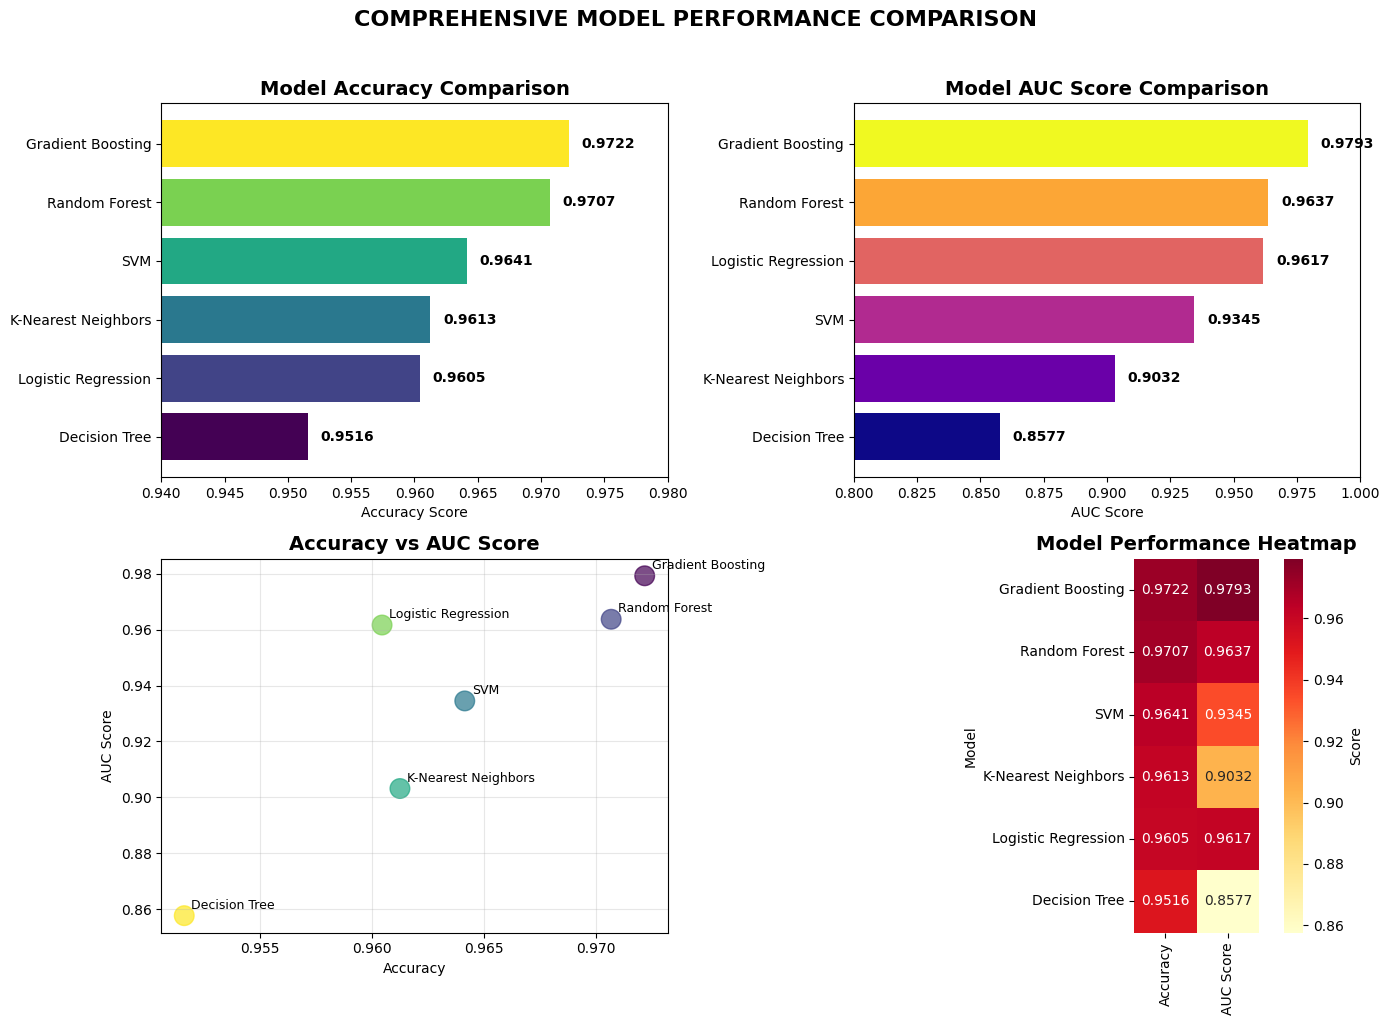


Generating Confusion Matrices for All Models...


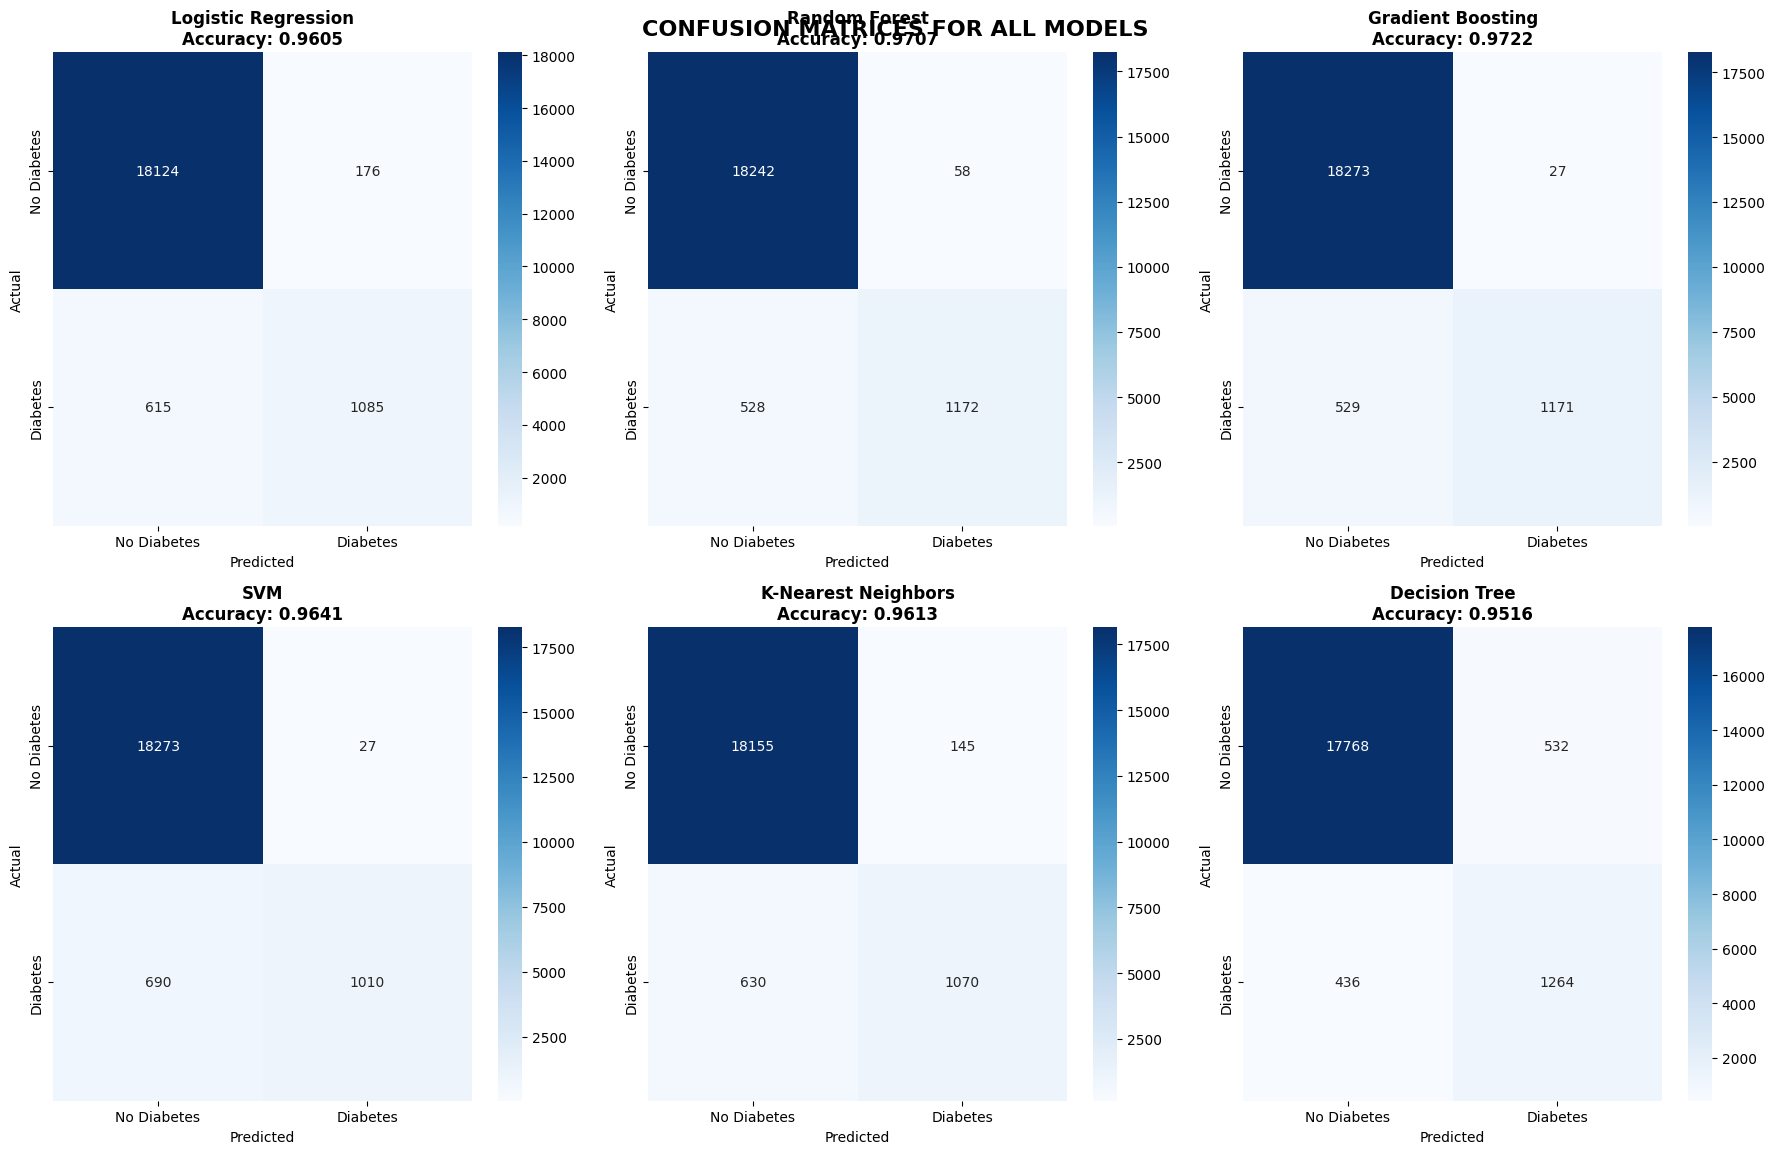


Generating ROC Curve Comparison...


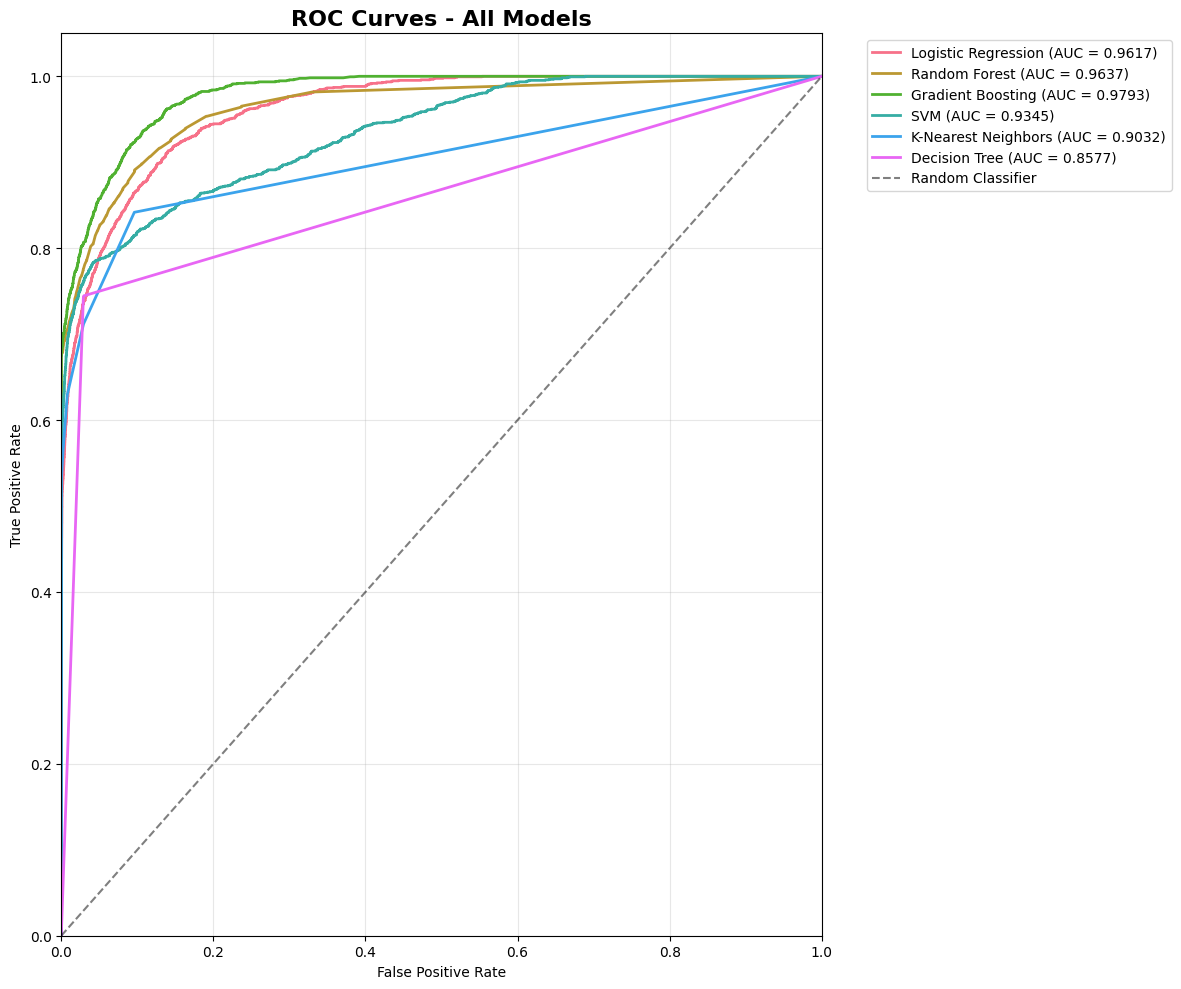


Generating Feature Importance Graphs...


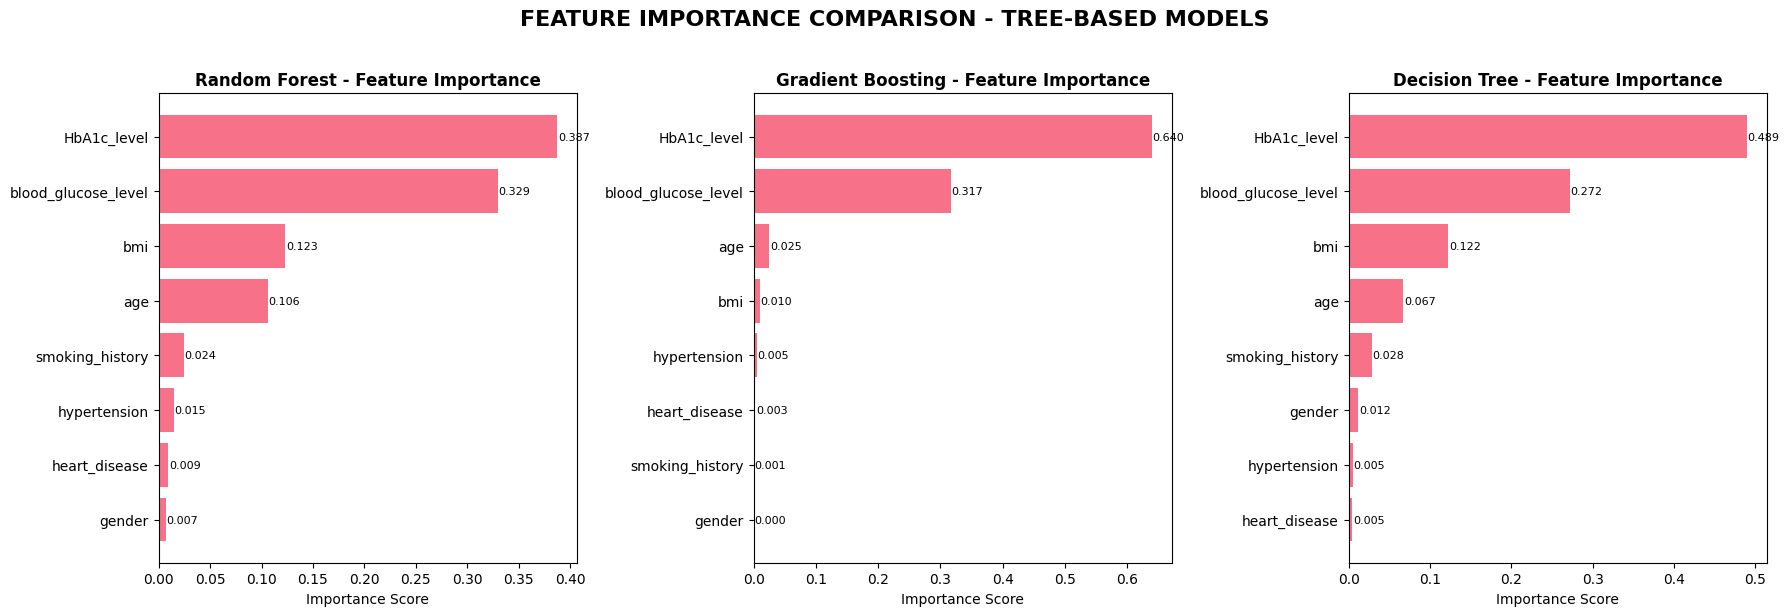

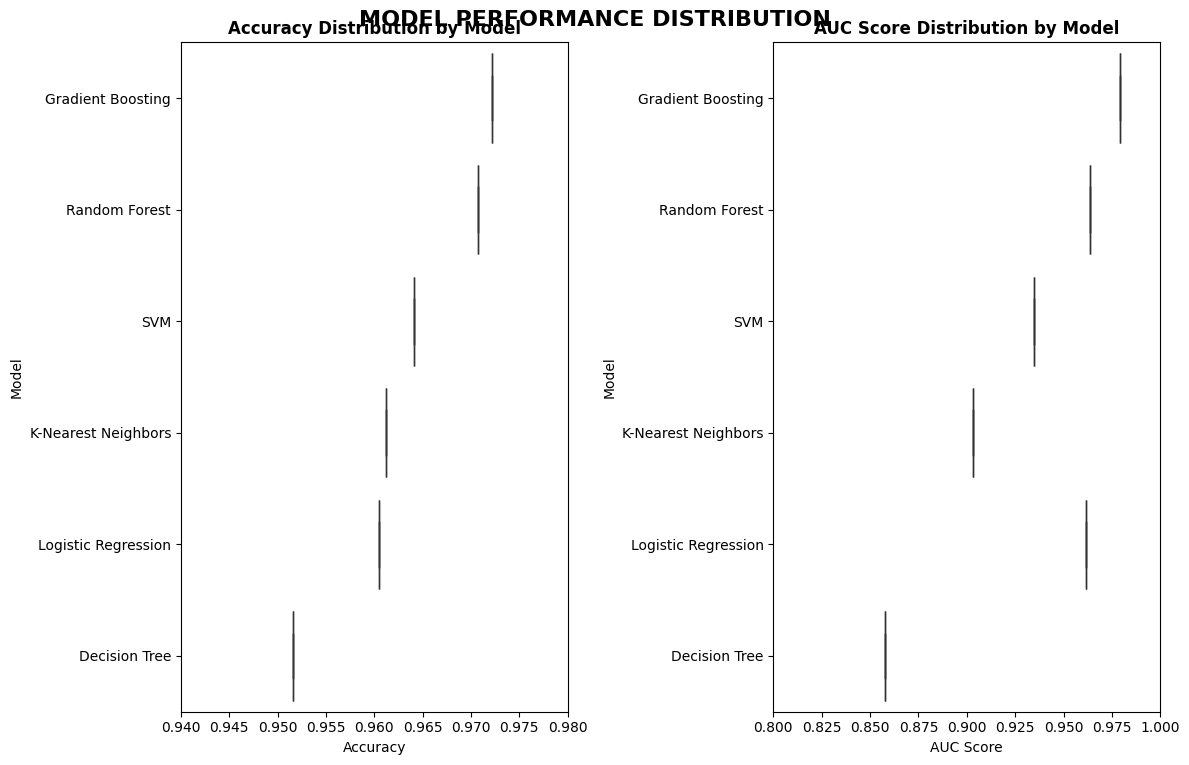

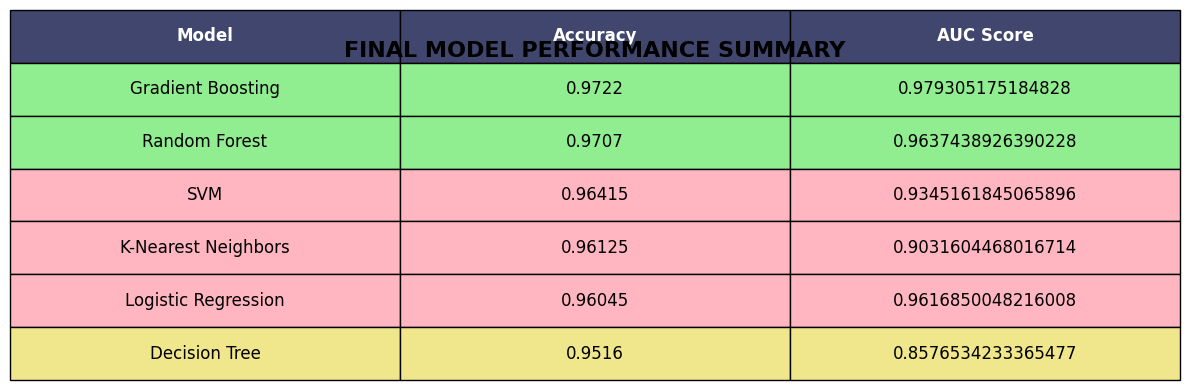


ALL GRAPHS GENERATED SUCCESSFULLY!

🏆 FINAL MODEL RANKINGS:
🥇 Gradient Boosting: Accuracy = 0.9722, AUC = 0.9793
🥈 Random Forest: Accuracy = 0.9707, AUC = 0.9637
🥉 SVM: Accuracy = 0.9641, AUC = 0.9345
4. K-Nearest Neighbors: Accuracy = 0.9613, AUC = 0.9032
5. Logistic Regression: Accuracy = 0.9605, AUC = 0.9617
6. Decision Tree: Accuracy = 0.9516, AUC = 0.8577


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Data Preprocessing
df_processed = df.copy()

# Encode categorical variables
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df_processed["gender"] = df_processed["gender"].map(gender_mapping)

smoking_mapping = {
    'never': 0, 'No Info': 1, 'former': 2,
    'not current': 3, 'ever': 4, 'current': 5
}
df_processed["smoking_history"] = df_processed["smoking_history"].map(smoking_mapping)

# Prepare features and target
X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================================================
# MODEL TRAINING AND EVALUATION WITH GRAPHS
# ================================================================

print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION WITH GRAPHS")
print("="*50)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    if name in ['SVM', 'K-Nearest Neighbors', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")

# Create performance comparison dataframe
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'AUC Score': [results[model]['auc_score'] for model in results]
}).sort_values('Accuracy', ascending=False)

print("\nModel Performance Summary:")
print(results_df)

# ================================================================
# CREATE COMPREHENSIVE GRAPHS FOR ALL MODELS
# ================================================================

print("\n" + "="*50)
print("CREATING COMPREHENSIVE MODEL COMPARISON GRAPHS")
print("="*50)

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Main Performance Comparison Graph
plt.figure(figsize=(14, 10))

# Plot 1: Accuracy Comparison
plt.subplot(2, 2, 1)
models_sorted = results_df.sort_values('Accuracy', ascending=True)
bars = plt.barh(models_sorted['Model'], models_sorted['Accuracy'],
                color=plt.cm.viridis(np.linspace(0, 1, len(models_sorted))))
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlim(0.94, 0.98)
# Add value labels on bars
for bar, acc in zip(bars, models_sorted['Accuracy']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{acc:.4f}', ha='left', va='center', fontweight='bold')

# Plot 2: AUC Score Comparison
plt.subplot(2, 2, 2)
models_sorted_auc = results_df.sort_values('AUC Score', ascending=True)
bars = plt.barh(models_sorted_auc['Model'], models_sorted_auc['AUC Score'],
                color=plt.cm.plasma(np.linspace(0, 1, len(models_sorted_auc))))
plt.xlabel('AUC Score')
plt.title('Model AUC Score Comparison', fontsize=14, fontweight='bold')
plt.xlim(0.8, 1.0)
# Add value labels on bars
for bar, auc in zip(bars, models_sorted_auc['AUC Score']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{auc:.4f}', ha='left', va='center', fontweight='bold')

# Plot 3: Combined Metrics Scatter Plot
plt.subplot(2, 2, 3)
scatter = plt.scatter(results_df['Accuracy'], results_df['AUC Score'],
                     s=200, c=range(len(results_df)), cmap='viridis', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('AUC Score')
plt.title('Accuracy vs AUC Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add model labels to points
for i, row in results_df.iterrows():
    plt.annotate(row['Model'], (row['Accuracy'], row['AUC Score']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Plot 4: Performance Heatmap
plt.subplot(2, 2, 4)
metrics_heatmap = results_df.set_index('Model')[['Accuracy', 'AUC Score']]
sns.heatmap(metrics_heatmap, annot=True, fmt='.4f', cmap='YlOrRd',
            cbar_kws={'label': 'Score'}, square=True)
plt.title('Model Performance Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.suptitle('COMPREHENSIVE MODEL PERFORMANCE COMPARISON',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2. Confusion Matrices for All Models
print("\nGenerating Confusion Matrices for All Models...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    y_pred = result['predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.4f}',
                       fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.suptitle('CONFUSION MATRICES FOR ALL MODELS',
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# 3. ROC Curves for All Models
print("\nGenerating ROC Curve Comparison...")

plt.figure(figsize=(12, 10))

from sklearn.metrics import roc_curve

# Plot ROC curve for each model
for name, result in results.items():
    y_pred_proba = result['probabilities']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = result['auc_score']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

# 4. Feature Importance for Tree-based Models
print("\nGenerating Feature Importance Graphs...")

tree_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']
tree_results = {name: results[name] for name in tree_models if name in results}

if tree_results:
    fig, axes = plt.subplots(1, len(tree_results), figsize=(18, 6))
    if len(tree_results) == 1:
        axes = [axes]

    for idx, (name, result) in enumerate(tree_results.items()):
        model = result['model']

        if hasattr(model, 'feature_importances_'):
            feature_importance = model.feature_importances_
            feature_names = X.columns

            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': feature_importance
            }).sort_values('Importance', ascending=True)

            bars = axes[idx].barh(importance_df['Feature'], importance_df['Importance'])
            axes[idx].set_title(f'{name} - Feature Importance', fontweight='bold')
            axes[idx].set_xlabel('Importance Score')

            # Add value labels
            for bar, imp in zip(bars, importance_df['Importance']):
                axes[idx].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                             f'{imp:.3f}', ha='left', va='center', fontsize=8)

    plt.suptitle('FEATURE IMPORTANCE COMPARISON - TREE-BASED MODELS',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# 5. Performance Distribution (Boxplot style)
plt.figure(figsize=(12, 8))

# Create data for boxplot
metrics_data = []
for name, result in results.items():
    metrics_data.extend([
        {'Model': name, 'Metric': 'Accuracy', 'Value': result['accuracy']},
        {'Model': name, 'Metric': 'AUC Score', 'Value': result['auc_score']}
    ])

metrics_df = pd.DataFrame(metrics_data)

plt.subplot(1, 2, 1)
sns.boxplot(data=results_df, y='Model', x='Accuracy', palette='viridis')
plt.title('Accuracy Distribution by Model', fontweight='bold')
plt.xlim(0.94, 0.98)

plt.subplot(1, 2, 2)
sns.boxplot(data=results_df, y='Model', x='AUC Score', palette='plasma')
plt.title('AUC Score Distribution by Model', fontweight='bold')
plt.xlim(0.8, 1.0)

plt.suptitle('MODEL PERFORMANCE DISTRIBUTION', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# 6. Final Summary Table Visualization
plt.figure(figsize=(12, 4))
plt.axis('off')

# Create a table
table_data = results_df.values
columns = results_df.columns

table = plt.table(cellText=table_data,
                 colLabels=columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Style the table
for i in range(len(columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color rows based on accuracy
for i in range(1, len(table_data) + 1):
    accuracy = float(table_data[i-1][1])
    if accuracy > 0.97:
        color = '#90EE90'  # Light green for high accuracy
    elif accuracy > 0.96:
        color = '#FFB6C1'  # Light red for medium accuracy
    else:
        color = '#F0E68C'  # Light yellow for lower accuracy

    for j in range(len(columns)):
        table[(i, j)].set_facecolor(color)

plt.title('FINAL MODEL PERFORMANCE SUMMARY', fontsize=16, fontweight='bold', y=0.85)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ALL GRAPHS GENERATED SUCCESSFULLY!")
print("="*50)

# Print final rankings
print("\n🏆 FINAL MODEL RANKINGS:")
print("="*30)
for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i}."
    print(f"{medal} {row['Model']}: Accuracy = {row['Accuracy']:.4f}, AUC = {row['AUC Score']:.4f}")

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a3437eea263abf2df33730063e457b391635f4adc9e5d8da27129973d9b44624
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8e46f2e51a559ac486b7c3f8205d0b72adc70118bd7dede7a7bc754690e8f83b
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


with SHAP and LIME

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

First few rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0    

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

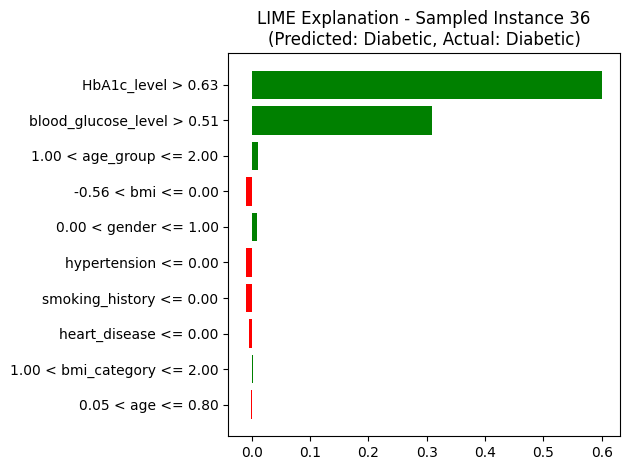


Top contributing features (LIME):
  HbA1c_level > 0.63: +0.6007
  blood_glucose_level > 0.51: +0.3088
  1.00 < age_group <= 2.00: +0.0114
  -0.56 < bmi <= 0.00: -0.0097
  0.00 < gender <= 1.00: +0.0094

################################################################################
ANALYZING NON DIABETIC CASE (Sampled Instance Index: 29)
################################################################################

SAMPLED INSTANCE 29 (Original Index: 37245) DETAILS
Actual: Non-Diabetic
Predicted: Non-Diabetic
Probability of Diabetes: 0.0000
Correct: True

Feature Values:
  gender: 1.0000
  age: 0.8477
  hypertension: 0.0000
  heart_disease: 0.0000
  smoking_history: 4.0000
  bmi: -0.1110
  HbA1c_level: -0.9597
  blood_glucose_level: -1.4283
  age_group: 3.0000
  bmi_category: 2.0000

SHAP Analysis for non_diabetic case:
SHAP values not in expected list format or class_idx 1 is out of bounds.

LIME Analysis for non_diabetic case:


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

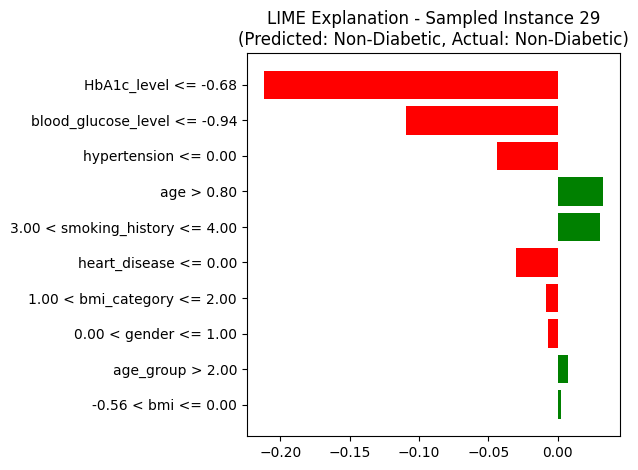


Top contributing features (LIME):
  HbA1c_level <= -0.68: -0.2120
  blood_glucose_level <= -0.94: -0.1092
  hypertension <= 0.00: -0.0439
  age > 0.80: +0.0326
  3.00 < smoking_history <= 4.00: +0.0305

################################################################################
ANALYZING MISCLASSIFIED CASE (Sampled Instance Index: 146)
################################################################################

SAMPLED INSTANCE 146 (Original Index: 53877) DETAILS
Actual: Diabetic
Predicted: Non-Diabetic
Probability of Diabetes: 0.0179
Correct: False

Feature Values:
  gender: 0.0000
  age: 0.1376
  hypertension: 0.0000
  heart_disease: 0.0000
  smoking_history: 4.0000
  bmi: -0.5296
  HbA1c_level: 0.2545
  blood_glucose_level: 0.4161
  age_group: 1.0000
  bmi_category: 1.0000

SHAP Analysis for misclassified case:
SHAP values not in expected list format or class_idx 1 is out of bounds.

LIME Analysis for misclassified case:


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

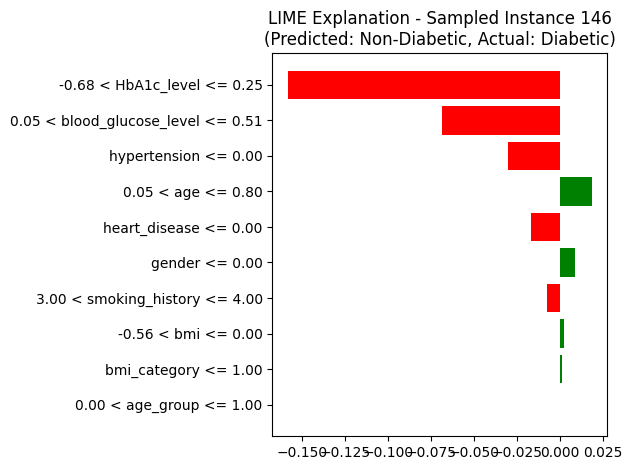


Top contributing features (LIME):
  -0.68 < HbA1c_level <= 0.25: -0.1586
  0.05 < blood_glucose_level <= 0.51: -0.0686
  hypertension <= 0.00: -0.0299
  0.05 < age <= 0.80: +0.0189
  heart_disease <= 0.00: -0.0168

Generating global SHAP summary plot...


<Figure size 1000x800 with 0 Axes>

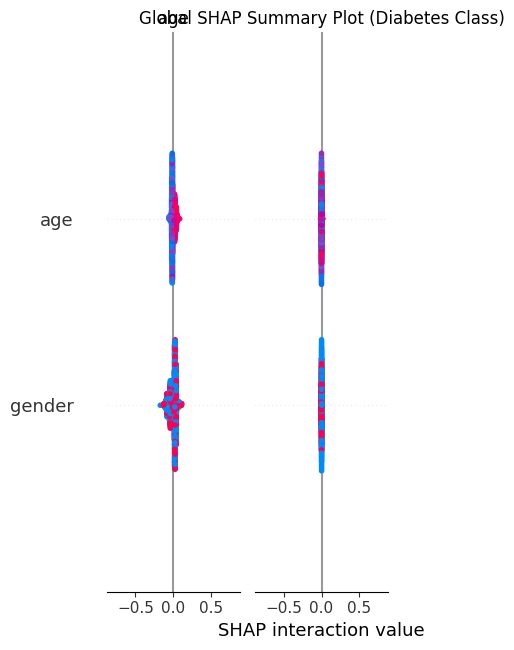


Feature Importance from Random Forest:
               feature  importance
6          HbA1c_level    0.508696
7  blood_glucose_level    0.387571
1                  age    0.031009
5                  bmi    0.022822
8            age_group    0.018914
2         hypertension    0.012736
9         bmi_category    0.007971
3        heart_disease    0.005803
4      smoking_history    0.003385
0               gender    0.001093

Overall accuracy (Full Test Set): 0.9722
Number of misclassified instances (Full Test Set): 555
Diabetes prevalence in full test set: 0.0850

EXAMPLE: Analyzing a high-risk diabetic case (from sampled data)

SAMPLED INSTANCE 36 (Original Index: 78252) DETAILS
Actual: Diabetic
Predicted: Diabetic
Probability of Diabetes: 1.0000
Correct: True

Feature Values:
  gender: 1.0000
  age: 0.4039
  hypertension: 0.0000
  heart_disease: 0.0000
  smoking_history: 0.0000
  bmi: -0.0221
  HbA1c_level: 1.3752
  blood_glucose_level: 2.0147
  age_group: 2.0000
  bmi_category: 2.0000


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

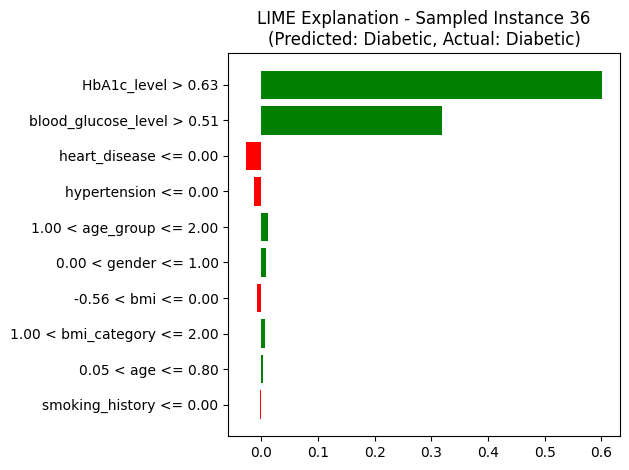

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import lime
import lime.lime_tabular
from lime import submodular_pick

# Load and explore the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nTarget distribution:")
print(df['diabetes'].value_counts())

# Data preprocessing
def preprocess_data(df):
    df_clean = df.copy()

    # Handle missing values if any
    print("Missing values:")
    print(df_clean.isnull().sum())

    # Encode categorical variables
    le_gender = LabelEncoder()
    le_smoking = LabelEncoder()

    df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])
    df_clean['smoking_history'] = le_smoking.fit_transform(df_clean['smoking_history'])

    # Feature engineering
    df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 30, 45, 60, 100],
                                 labels=[0, 1, 2, 3])
    df_clean['bmi_category'] = pd.cut(df_clean['bmi'], bins=[0, 18.5, 25, 30, 100],
                                   labels=[0, 1, 2, 3])

    return df_clean, le_gender, le_smoking

# Preprocess the data
df_processed, le_gender, le_smoking = preprocess_data(df)

# Prepare features and target
feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
                  'bmi', 'HbA1c_level', 'blood_glucose_level', 'age_group', 'bmi_category']
X = df_processed[feature_columns]
y = df_processed['diabetes']

# Split the data
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features (using the scaler fitted on X_train)
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_full[numerical_cols] = scaler.transform(X_test_full[numerical_cols])

print(f"Training set size: {X_train.shape}")
print(f"Full Test set size: {X_test_full.shape}")

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

# Make predictions on the full test set
y_pred_full = model.predict(X_test_full)
y_pred_proba_full = model.predict_proba(X_test_full)

# Evaluate model on the full test set
print("\nModel Performance (Full Test Set):")
print(f"Accuracy: {accuracy_score(y_test_full, y_pred_full):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_full))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full))

# Sample the test data for SHAP and LIME for faster computation
SAMPLE_SIZE_EXPLAINABILITY = min(1000, len(X_test_full)) # Use a reasonable sample size
X_test_sampled = X_test_full.sample(n=SAMPLE_SIZE_EXPLAINABILITY, random_state=42)
y_test_sampled = y_test_full.loc[X_test_sampled.index] # Get corresponding target values
y_pred_sampled = y_pred_full[X_test_full.index.get_indexer(X_test_sampled.index)] # Get corresponding predictions
y_pred_proba_sampled = y_pred_proba_full[X_test_full.index.get_indexer(X_test_sampled.index)] # Get corresponding probabilities


print(f"\nUsing {SAMPLE_SIZE_EXPLAINABILITY} samples from test set for explanations.")
print(f"Sampled Test set size: {X_test_sampled.shape}")


# SHAP Explanation Setup - Calculate SHAP values for the sampled test set
explainer_shap = shap.TreeExplainer(model)
try:
    shap_values = explainer_shap.shap_values(X_test_sampled)
    print(f"\nSHAP values calculated. Type: {type(shap_values)}")
    if isinstance(shap_values, list):
        print(f"SHAP values list length: {len(shap_values)}")
        for i, arr in enumerate(shap_values):
            print(f"  Array {i} shape: {arr.shape}")
    elif isinstance(shap_values, np.ndarray):
         print(f"SHAP values array shape: {shap_values.shape}")

except Exception as e:
    print(f"Error calculating SHAP values for sampled test set: {e}")
    shap_values = None # Set to None if calculation fails


# LIME Explanation Setup
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # Use training data for background
    feature_names=feature_columns,
    class_names=['Non-Diabetic', 'Diabetic'],
    mode='classification',
    random_state=42
)

# Function for SHAP waterfall plot
def plot_shap_waterfall(instance_idx, class_idx=1):
    """Plot SHAP waterfall plot for a specific instance (using sampled data indices)"""
    plt.figure(figsize=(10, 8))

    if shap_values is None:
        print("SHAP values not available due to prior calculation error.")
        return None

    try:
        # Ensure shap_values is a list for binary classification
        if not isinstance(shap_values, list) or len(shap_values) <= class_idx:
             print(f"SHAP values not in expected list format or class_idx {class_idx} is out of bounds.")
             return None

        # Access the array for the specified class
        shap_values_class = shap_values[class_idx]

        # Ensure instance_idx is valid for the selected SHAP values array
        if instance_idx >= shap_values_class.shape[0]:
             print(f"Error: Instance index {instance_idx} is out of bounds for SHAP values array with size {shap_values_class.shape[0]}.")
             return None

        # Access SHAP values for the specific instance and class
        shap_value_instance = shap_values_class[instance_idx, :] # Corrected indexing

        # Get the corresponding expected value
        expected_value = explainer_shap.expected_value[class_idx] if isinstance(explainer_shap.expected_value, list) else explainer_shap.expected_value


        print(f"Attempting SHAP plot for instance {instance_idx}. SHAP value instance shape: {shap_value_instance.shape}") # Debug print
        print(f"Expected value: {expected_value}") # Debug print
        print(f"Instance data shape: {X_test_sampled.iloc[[instance_idx]].shape}") # Debug print


        shap.waterfall_plot(
            shap.Explanation(
                values=shap_value_instance,
                base_values=expected_value,
                data=X_test_sampled.iloc[instance_idx], # Use iloc for positional indexing in sampled data
                feature_names=feature_columns
            ),
            show=False
        )
        plt.title(f'SHAP Waterfall Plot - Sampled Instance {instance_idx}\n(Predicted: {"Diabetic" if y_pred_sampled[instance_idx] == 1 else "Non-Diabetic"}, Actual: {"Diabetic" if y_test_sampled.iloc[instance_idx] == 1 else "Non-Diabetic"})')
        plt.tight_layout()
        plt.show()

        return shap_value_instance

    except Exception as e:
         print(f"Error generating SHAP plot for instance {instance_idx}: {e}")
         return None


# Function for LIME explanation
def plot_lime_explanation(instance_idx, num_features=10):
    """Plot LIME explanation for a specific instance (using sampled data indices)"""
    instance = X_test_sampled.iloc[instance_idx] # Use iloc for positional indexing in sampled data
    exp = explainer_lime.explain_instance(
        instance.values,
        model.predict_proba,
        num_features=num_features
    )

    plt.figure(figsize=(10, 6))
    exp.as_pyplot_figure()
    plt.title(f'LIME Explanation - Sampled Instance {instance_idx}\n(Predicted: {"Diabetic" if y_pred_sampled[instance_idx] == 1 else "Non-Diabetic"}, Actual: {"Diabetic" if y_test_sampled.iloc[instance_idx] == 1 else "Non-Diabetic"})')
    plt.tight_layout()
    plt.show()

    return exp

# Function to display instance details
def display_instance_details(instance_idx):
    """Display details of a specific instance (using sampled data indices)"""
    instance = X_test_sampled.iloc[instance_idx] # Use iloc for positional indexing in sampled data
    actual = y_test_sampled.iloc[instance_idx] # Use iloc for positional indexing in sampled data
    predicted = y_pred_sampled[instance_idx] # y_pred is aligned with sampled X_test
    probability = y_pred_proba_sampled[instance_idx][1] # y_pred_proba is aligned with sampled X_test

    # Get original index from the full test set
    original_index = X_test_sampled.index[instance_idx]

    print(f"\n{'='*60}")
    print(f"SAMPLED INSTANCE {instance_idx} (Original Index: {original_index}) DETAILS")
    print(f"{'='*60}")
    print(f"Actual: {'Diabetic' if actual == 1 else 'Non-Diabetic'}")
    print(f"Predicted: {'Diabetic' if predicted == 1 else 'Non-Diabetic'}")
    print(f"Probability of Diabetes: {probability:.4f}")
    print(f"Correct: {actual == predicted}")
    print(f"\nFeature Values:")
    for feature in feature_columns:
        print(f"  {feature}: {instance[feature]:.4f}")
    print(f"{'='*60}")

# Find interesting cases for explanation (using sampled data)
def find_interesting_cases(y_test_sampled, y_pred_sampled, y_pred_proba_sampled):
    """Find correctly predicted diabetic, non-diabetic, and misclassified cases in the sampled data"""
    correct_diabetic = []
    correct_non_diabetic = []
    misclassified = []

    # Use enumerate with the sampled test set for correct indices
    for idx, (actual, predicted, prob) in enumerate(zip(y_test_sampled, y_pred_sampled, y_pred_proba_sampled[:, 1])):
        if actual == predicted:
            if actual == 1 and prob > 0.7:  # High confidence diabetic
                correct_diabetic.append((idx, prob))
            elif actual == 0 and prob < 0.3:  # High confidence non-diabetic
                correct_non_diabetic.append((idx, prob))
        else:
            misclassified.append((idx, prob))

    # Sort by confidence
    correct_diabetic.sort(key=lambda x: x[1], reverse=True)
    correct_non_diabetic.sort(key=lambda x: x[1])
    misclassified.sort(key=lambda x: abs(x[1] - 0.5), reverse=True)

    return {
        'diabetic': correct_diabetic[0][0] if correct_diabetic else None,
        'non_diabetic': correct_non_diabetic[0][0] if correct_non_diabetic else None,
        'misclassified': misclassified[0][0] if misclassified else None
    }

# Main execution
print("\nFinding interesting cases for explanation from sampled data...")
cases = find_interesting_cases(y_test_sampled, y_pred_sampled, y_pred_proba_sampled)

# Explain each case
for case_type, instance_idx in cases.items():
    if instance_idx is not None:
        print(f"\n{'#'*80}")
        print(f"ANALYZING {case_type.upper().replace('_', ' ')} CASE (Sampled Instance Index: {instance_idx})")
        print(f"{'#'*80}")

        # Display instance details (using sampled data index)
        display_instance_details(instance_idx)

        # SHAP explanation (using sampled data index)
        print(f"\nSHAP Analysis for {case_type} case:")

        try:
            shap_values_instance = plot_shap_waterfall(instance_idx)
            if shap_values_instance is not None:
                 # Print feature importance summary from SHAP
                 print(f"\nTop contributing features (SHAP):")
                 feature_imp = list(zip(feature_columns, shap_values_instance))
                 feature_imp.sort(key=lambda x: abs(x[1]), reverse=True)
                 for feature, importance in feature_imp[:5]:
                     print(f"  {feature}: {importance:+.4f}")

        except Exception as e:
             print(f"Error generating SHAP plot for instance {instance_idx}: {e}")


        # LIME explanation (using sampled data index)
        print(f"\nLIME Analysis for {case_type} case:")
        try:
            # Ensure the instance_idx is valid for the X_test (sampled) data used by LIME
            if instance_idx < len(X_test_sampled):
                lime_exp = plot_lime_explanation(instance_idx)
                 # Print feature importance summary from LIME
                print(f"\nTop contributing features (LIME):")
                features_weights = lime_exp.as_list()
                for feature, weight in features_weights[:5]:
                     print(f"  {feature}: {weight:+.4f}")
            else:
                 print(f"Skipping LIME plot for instance {instance_idx}: index out of bounds for LIME sample size.")
        except Exception as e:
             print(f"Error generating LIME plot for instance {instance_idx}: {e}")


# Additional: Global SHAP summary plot (using sampled data)
print("\nGenerating global SHAP summary plot...")
try:
    # Use the SHAP values calculated for the sampled test set for the summary plot
    if shap_values is not None:
        plt.figure(figsize=(10, 8))
        # Check if shap_values is a list (for multi-output) or numpy array (for single output)
        if isinstance(shap_values, list):
            # Use the SHAP values for the positive class (index 1)
            shap.summary_plot(shap_values[1], X_test_sampled, feature_names=feature_columns, show=False)
        else:
             shap.summary_plot(shap_values, X_test_sampled, feature_names=feature_columns, show=False)
        plt.title("Global SHAP Summary Plot (Diabetes Class)")
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping global SHAP summary plot as SHAP values were not calculated successfully.")
except Exception as e:
    print(f"Error generating global SHAP summary plot: {e}")


# Feature importance from model
print("\nFeature Importance from Random Forest:")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Save results for further analysis (using full test set predictions)
results_df_full = X_test_full.copy()
results_df_full['actual'] = y_test_full.values
results_df_full['predicted'] = y_pred_full
results_df_full['probability'] = y_pred_proba_full[:, 1]
results_df_full['correct'] = (results_df_full['actual'] == results_df_full['predicted'])

print(f"\nOverall accuracy (Full Test Set): {accuracy_score(y_test_full, y_pred_full):.4f}")
print(f"Number of misclassified instances (Full Test Set): {len(results_df_full[~results_df_full['correct']])}")
print(f"Diabetes prevalence in full test set: {y_test_full.mean():.4f}")

# Example of analyzing a specific high-risk case (using sampled data indices)
print("\n" + "="*80)
print("EXAMPLE: Analyzing a high-risk diabetic case (from sampled data)")
print("="*80)

# Find instance with highest probability of diabetes in the sampled test set
high_risk_sampled_idx = np.argmax(y_pred_proba_sampled[:, 1])

# Ensure the high_risk_sampled_idx is valid for the sampled data indices
if high_risk_sampled_idx < len(X_test_sampled):
    display_instance_details(high_risk_sampled_idx)
    plot_shap_waterfall(high_risk_sampled_idx)
    plot_lime_explanation(high_risk_sampled_idx)
else:
    print(f"Skipping high-risk case analysis: index {high_risk_sampled_idx} out of bounds for sampled data size {len(X_test_sampled)}.")

Partial Dependence Plot (PDP)

Model trained successfully!
Accuracy: 0.9617

PARTIAL DEPENDENCE PLOTS (PDP) ANALYSIS
Analyzing top features: ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

1. Individual Partial Dependence Plots:


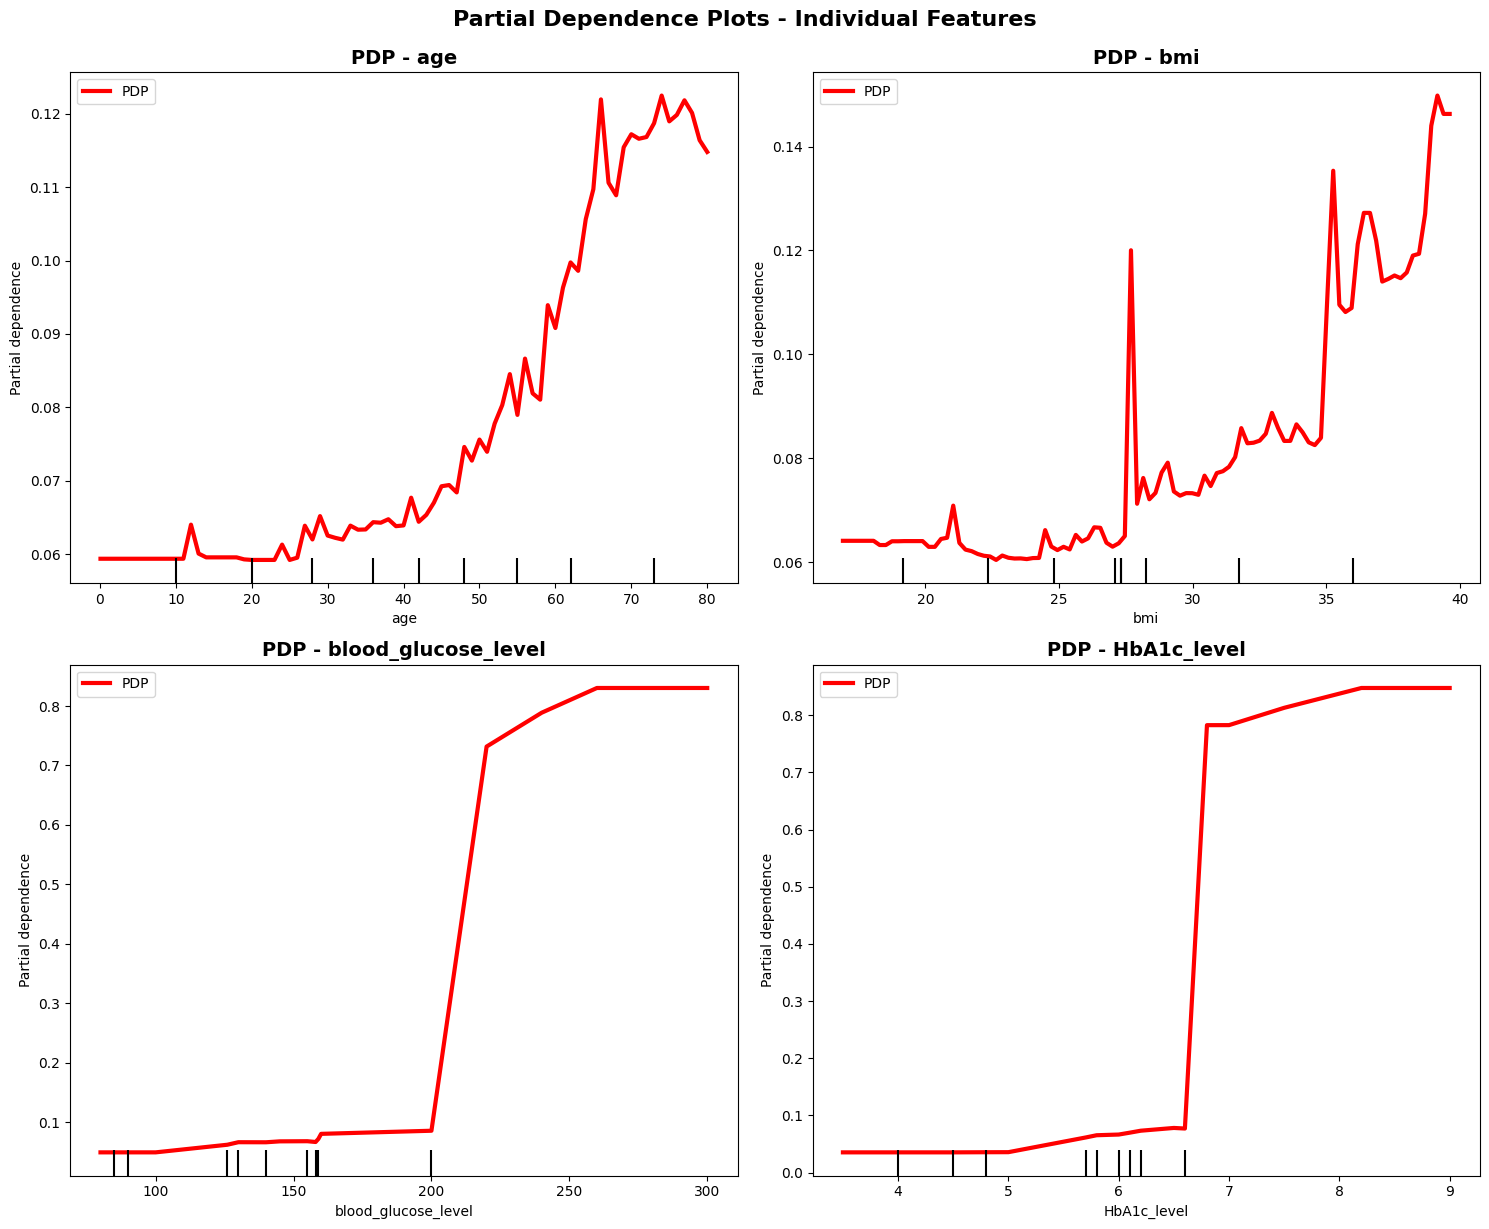


2. ICE Plots (Individual Conditional Expectation):


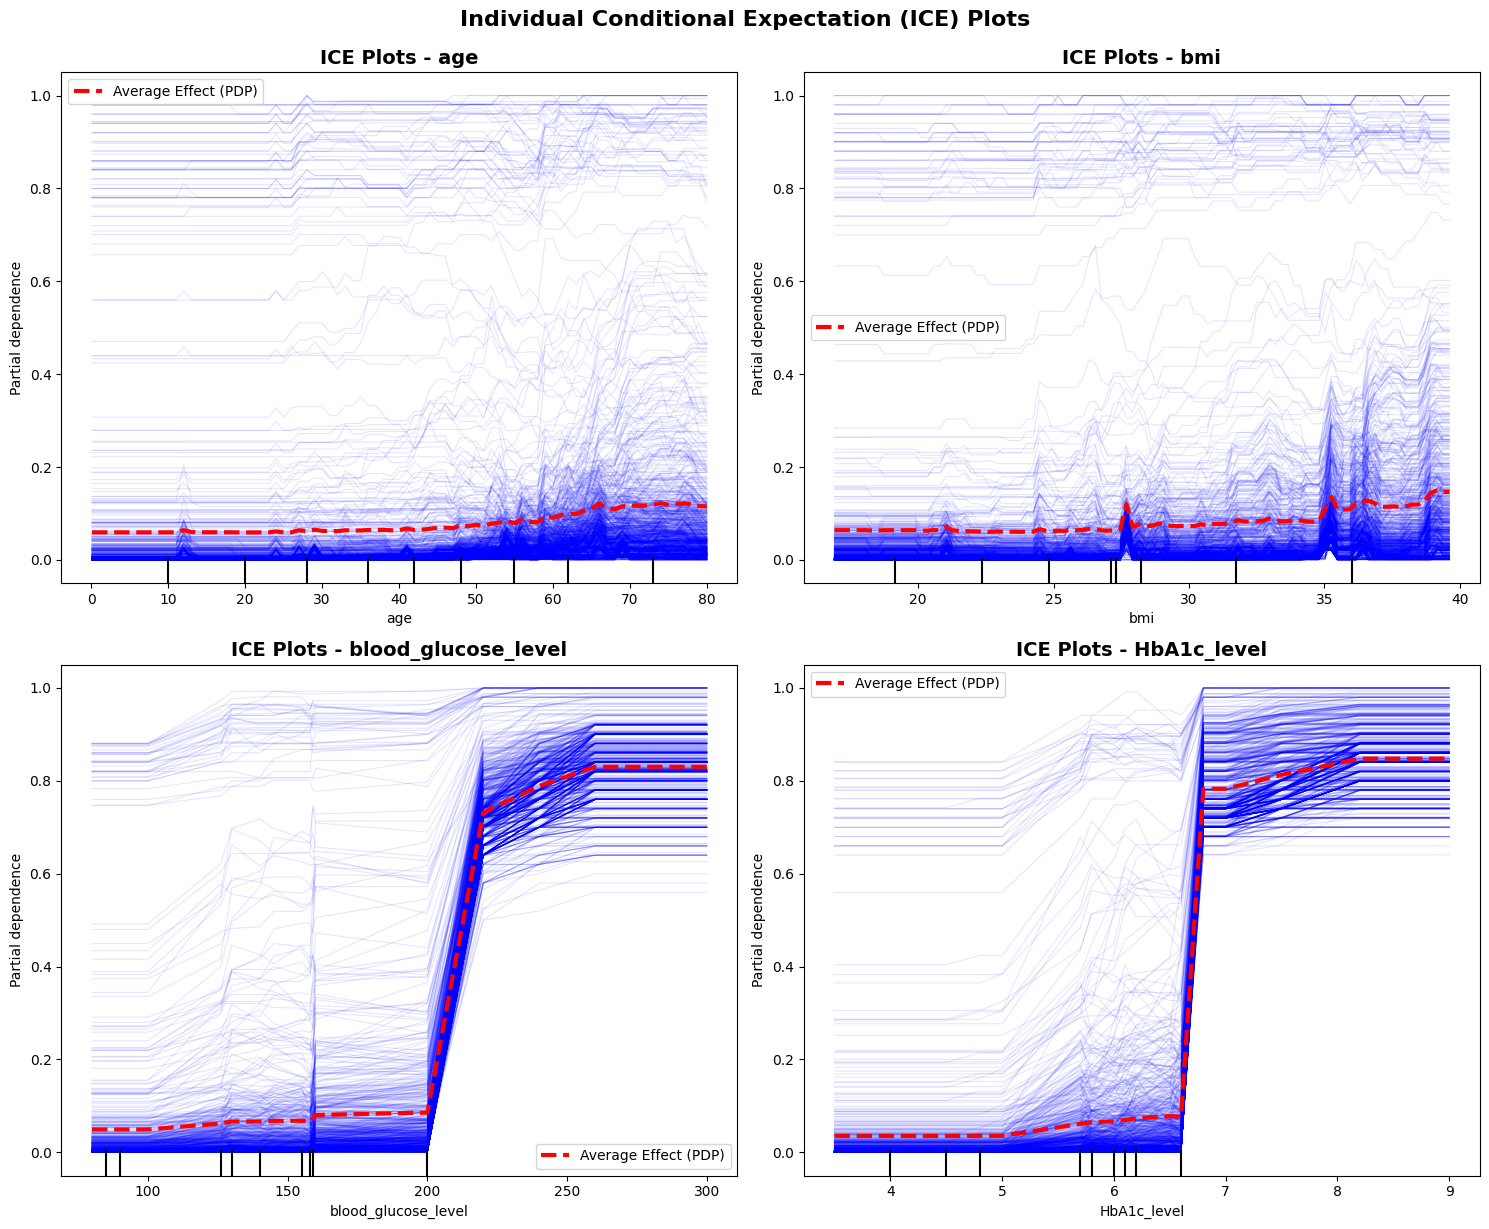


3. 2D Partial Dependence Plots (Feature Interactions):


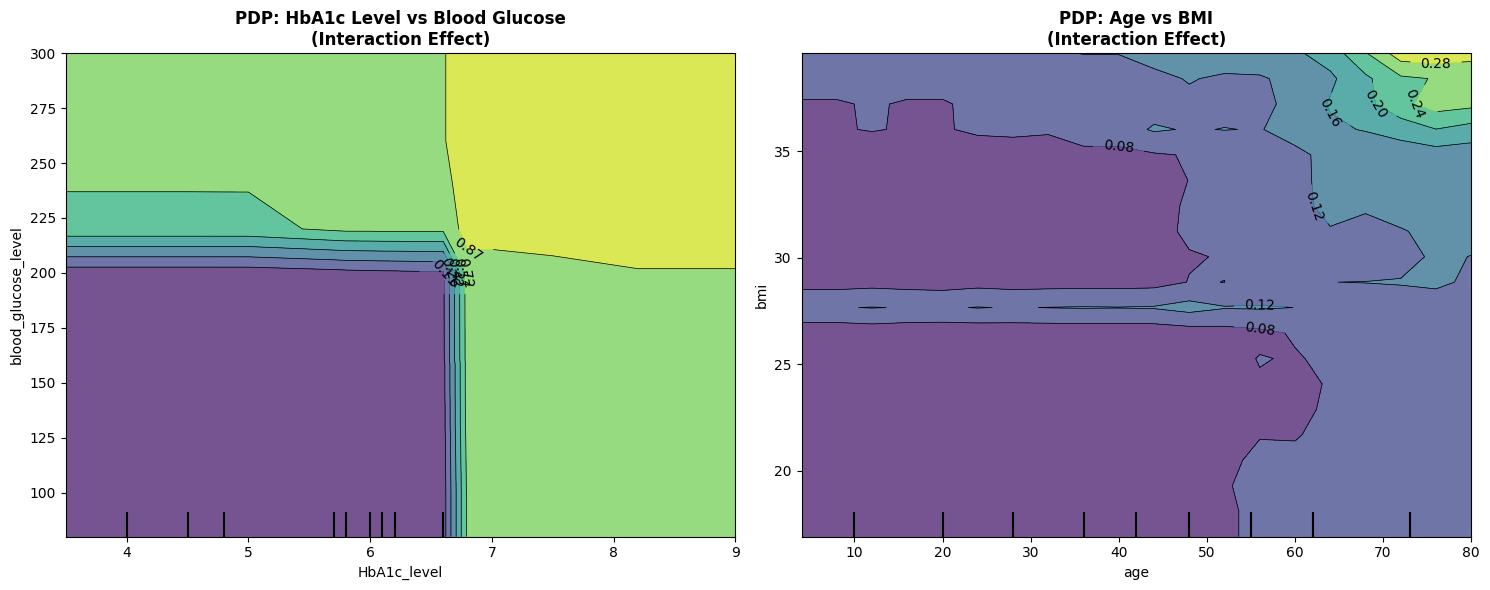


4. Clinical Interpretation of Partial Dependence:

📊 Clinical Interpretation of PDP Results:
--------------------------------------------------

5. PDP vs Actual Data Distribution:


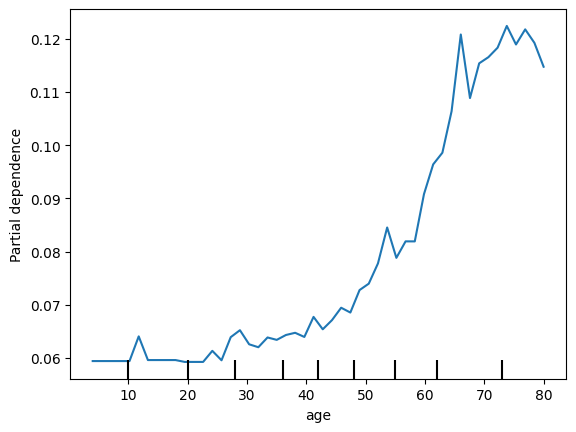

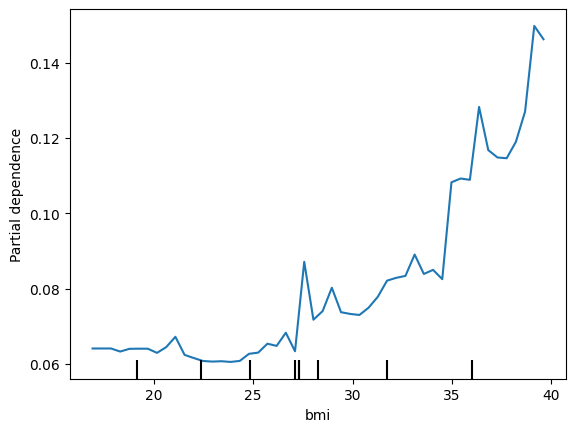

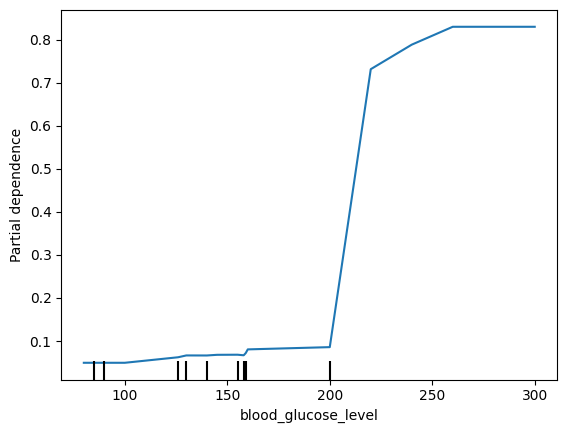

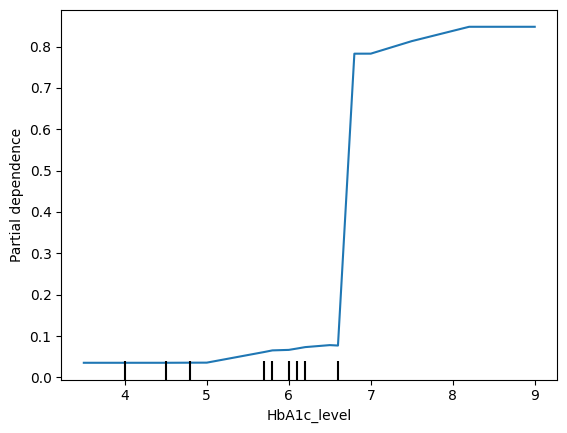

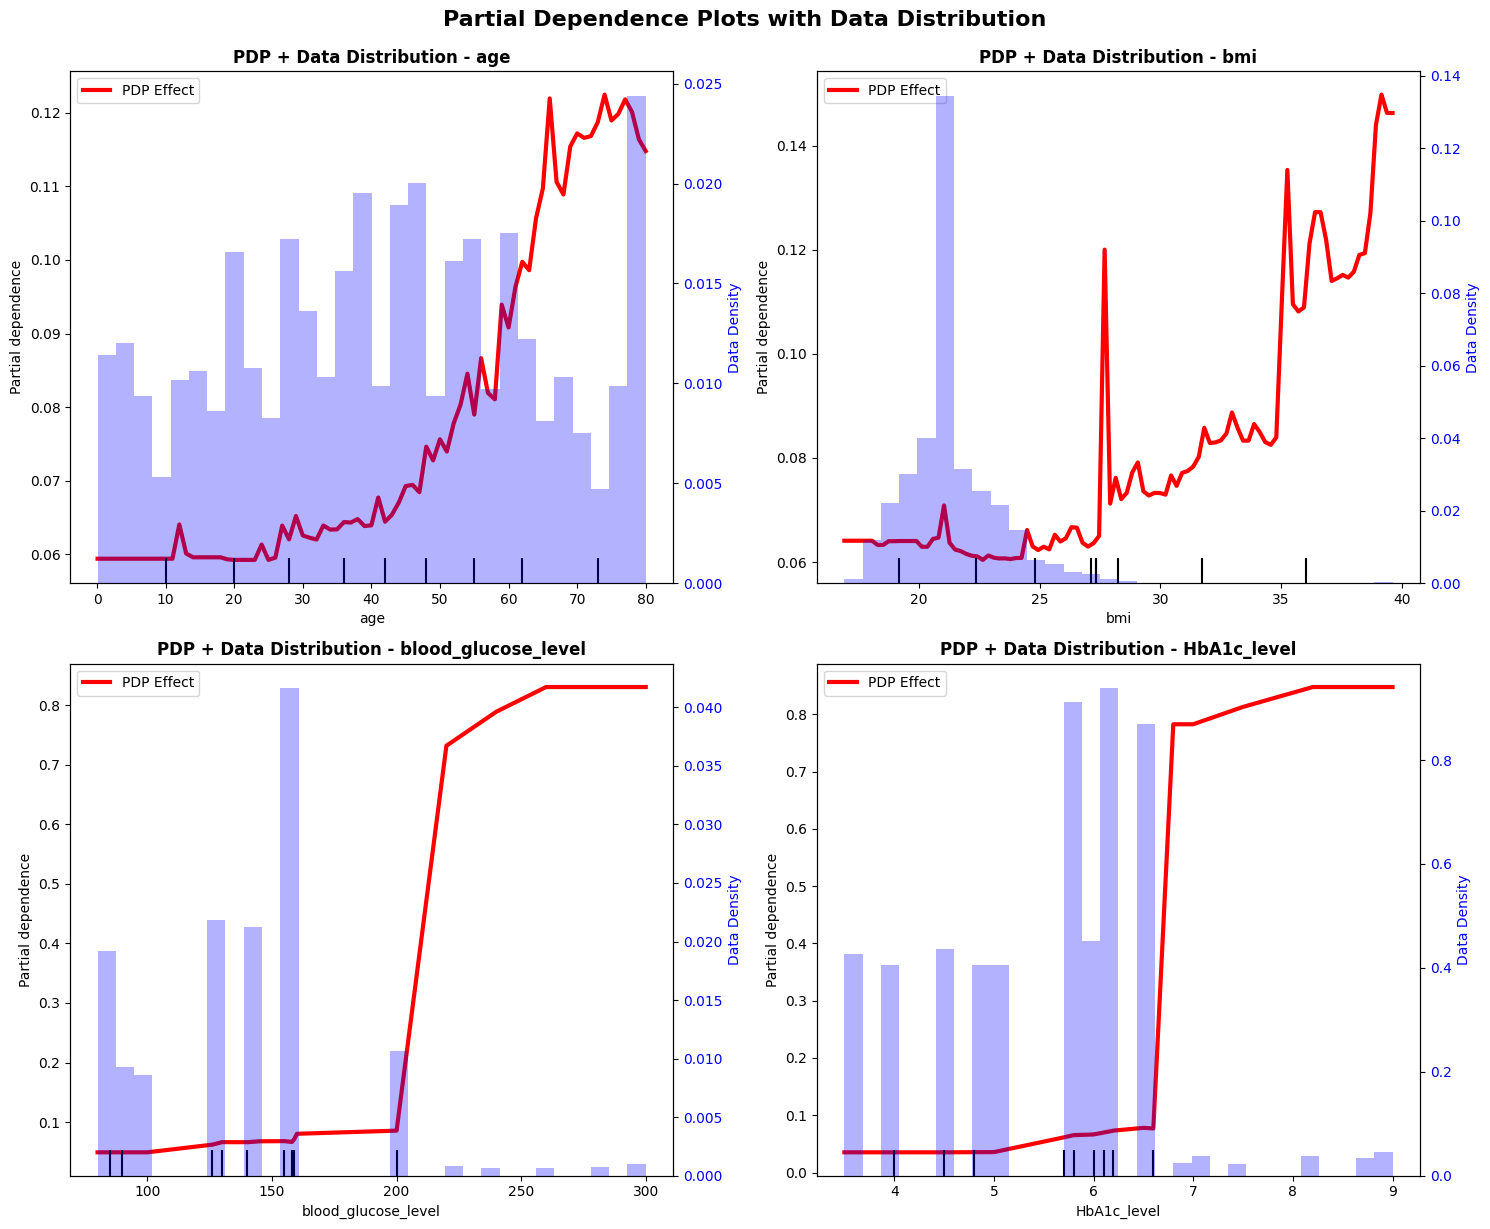


✅ PDP analysis completed successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

# Use smaller sample for faster execution
SAMPLE_SIZE = min(3000, len(df))
df = df.sample(n=SAMPLE_SIZE, random_state=42)

# Fast preprocessing
df_processed = df.copy()
df_processed['gender'] = df_processed['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
smoking_mapping = {'never': 0, 'No Info': 1, 'former': 2, 'not current': 3, 'ever': 4, 'current': 5}
df_processed['smoking_history'] = df_processed['smoking_history'].map(smoking_mapping)

X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10)
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")

# =============================================================================
# PARTIAL DEPENDENCE PLOTS (PDP) ONLY
# =============================================================================
print("\n" + "="*50)
print("PARTIAL DEPENDENCE PLOTS (PDP) ANALYSIS")
print("="*50)

# Get feature importance to select most important features
feature_importance = model.feature_importances_
important_features_idx = np.argsort(feature_importance)[-4:]  # Top 4 features
important_features = [feature_names[i] for i in important_features_idx]

print(f"Analyzing top features: {important_features}")

# 1. Individual PDP Plots
print("\n1. Individual Partial Dependence Plots:")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        ax=axes[i],
        line_kw={"color": "red", "linewidth": 3, "label": "PDP"}
    )
    axes[i].set_title(f'PDP - {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Partial Dependence\n(Effect on Diabetes Prediction)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

    # Add clinical insights
    if feature == 'HbA1c_level':
        axes[i].axvline(x=6.5, color='red', linestyle='--', alpha=0.7, label='Diabetes Threshold (6.5)')
        axes[i].legend()
    elif feature == 'blood_glucose_level':
        axes[i].axvline(x=200, color='red', linestyle='--', alpha=0.7, label='High Glucose (200)')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Partial Dependence Plots - Individual Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 2. ICE Plots (Individual Conditional Expectation)
print("\n2. ICE Plots (Individual Conditional Expectation):")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        ax=axes[i],
        kind='both',  # Shows both PDP and ICE
        ice_lines_kw={"color": "blue", "alpha": 0.1, "linewidth": 0.8},
        pd_line_kw={"color": "red", "linewidth": 3, "label": "Average Effect (PDP)"},
        random_state=42
    )
    axes[i].set_title(f'ICE Plots - {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Partial Dependence')
    axes[i].grid(True, alpha=0.3)

    # Custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='blue', alpha=0.5, linewidth=2, label='Individual Patients (ICE)'),
        Line2D([0], [0], color='red', linewidth=3, label='Average Effect (PDP)')
    ]
    axes[i].legend(handles=legend_elements)

plt.tight_layout()
plt.suptitle('Individual Conditional Expectation (ICE) Plots', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 3. 2D PDP Plots for feature interactions
print("\n3. 2D Partial Dependence Plots (Feature Interactions):")

# Select top 2 features for 2D plot
top_2_features = important_features[:2]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: HbA1c vs Blood Glucose (if available)
if 'HbA1c_level' in important_features and 'blood_glucose_level' in important_features:
    PartialDependenceDisplay.from_estimator(
        model, X_train, [('HbA1c_level', 'blood_glucose_level')],
        ax=axes[0],
        grid_resolution=20
    )
    axes[0].set_title('PDP: HbA1c Level vs Blood Glucose\n(Interaction Effect)', fontweight='bold')

# Plot 2: Age vs BMI (if available)
if 'age' in important_features and 'bmi' in important_features:
    PartialDependenceDisplay.from_estimator(
        model, X_train, [('age', 'bmi')],
        ax=axes[1],
        grid_resolution=20
    )
    axes[1].set_title('PDP: Age vs BMI\n(Interaction Effect)', fontweight='bold')
else:
    # Use any other combination
    if len(important_features) >= 2:
        PartialDependenceDisplay.from_estimator(
            model, X_train, [(important_features[0], important_features[1])],
            ax=axes[1],
            grid_resolution=20
        )
        axes[1].set_title(f'PDP: {important_features[0]} vs {important_features[1]}\n(Interaction Effect)', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Clinical Insights from PDP
print("\n4. Clinical Interpretation of Partial Dependence:")

# Analyze PDP patterns for clinical interpretation
clinical_insights = {}

for feature in important_features:
    # Calculate PDP values manually for insights
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_train, [feature], grid_resolution=50, kind='average'
    )

    # Access the computed data directly (using internal attributes)
    if hasattr(pdp_display, '_average_partial_dependence') and hasattr(pdp_display, '_feature_values'):
        pdp_values = pdp_display._average_partial_dependence[0] # Access the values for the first (and only) target
        feature_values = pdp_display._feature_values[0] # Access the values for the first (and only) feature

        # Calculate slope (rate of change)
        if len(pdp_values) > 1 and len(feature_values) > 1:
             # Calculate average slope across intervals
            slopes = np.diff(pdp_values) / np.diff(feature_values)
            average_slope = np.mean(slopes)


            # Clinical interpretation based on average slope
            if average_slope > 0.001: # Use a small threshold to account for minor fluctuations
                trend = "INCREASING risk with higher values"
            elif average_slope < -0.001: # Use a small threshold
                trend = "DECREASING risk with higher values"
            else:
                trend = "LITTLE effect on risk"

            clinical_insights[feature] = {
                'trend': trend,
                'average_slope': average_slope,
                'min_effect': min(pdp_values),
                'max_effect': max(pdp_values)
            }
        else:
             print(f"Warning: Not enough data points for feature '{feature}' to calculate slope.")
    else:
         print(f"Warning: Could not retrieve PDP data for feature '{feature}' using internal attributes.")


print("\n📊 Clinical Interpretation of PDP Results:")
print("-" * 50)
for feature, insights in clinical_insights.items():
    print(f"\n{feature}:")
    print(f"  Trend: {insights['trend']}")
    print(f"  Effect Range: {insights['min_effect']:.3f} to {insights['max_effect']:.3f}")
    print(f"  Average Slope: {insights['average_slope']:.4f}")


# 5. Comparison with actual data distribution
print("\n5. PDP vs Actual Data Distribution:")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    # PDP plot
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        ax=axes[i],
        line_kw={"color": "red", "linewidth": 3, "label": "PDP Effect"}
    )

    # Add histogram of actual data
    ax2 = axes[i].twinx()
    ax2.hist(X_train[feature], bins=30, alpha=0.3, color='blue', density=True, label='Data Distribution')
    ax2.set_ylabel('Data Density', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    axes[i].set_title(f'PDP + Data Distribution - {feature}', fontweight='bold')
    axes[i].set_ylabel('PDP Effect', color='red')
    axes[i].tick_params(axis='y', labelcolor='red')
    axes[i].grid(True, alpha=0.3)

    # Combined legend
    lines1, labels1 = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[i].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.suptitle('Partial Dependence Plots with Data Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n✅ PDP analysis completed successfully!")

ICE Plot

Model trained successfully!
Accuracy: 0.9617

INDIVIDUAL CONDITIONAL EXPECTATION (ICE) PLOTS
Analyzing ICE plots for top features: ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

1. Basic ICE Plots:


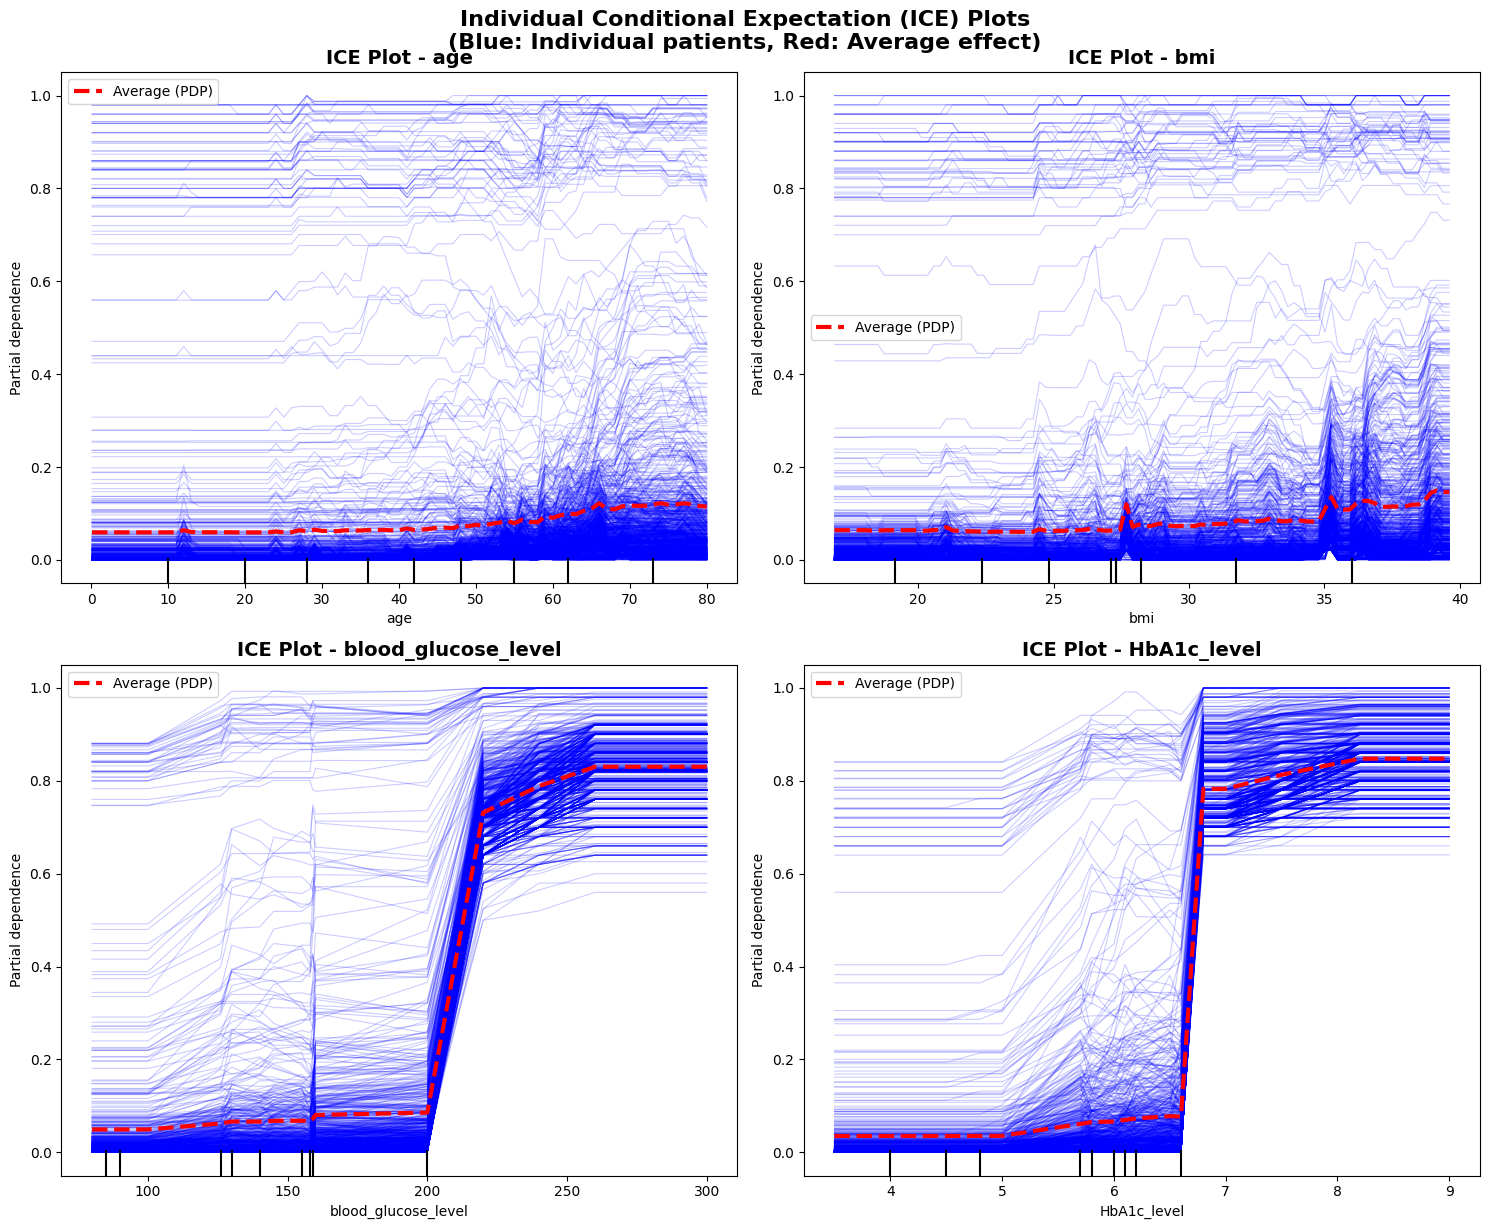


2. Centered ICE Plots:


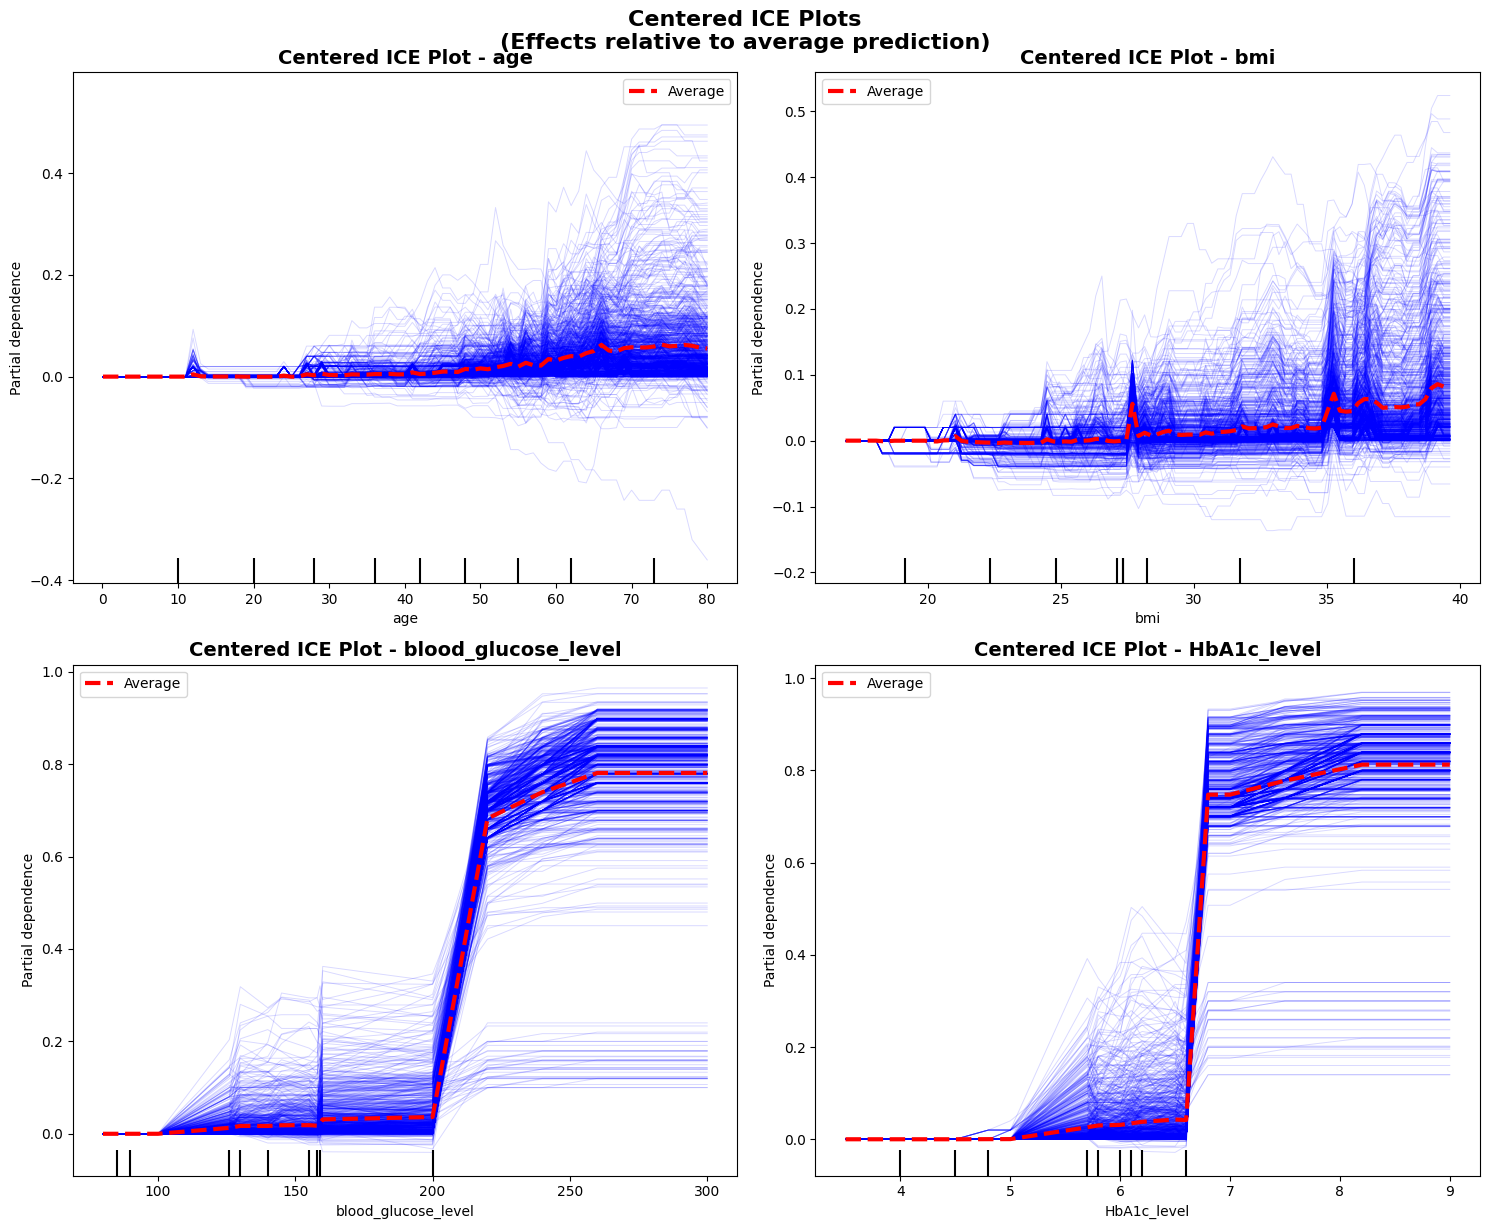


3. ICE Heterogeneity Analysis:

📊 ICE Heterogeneity Analysis:
--------------------------------------------------

4. Subgroup ICE Analysis:


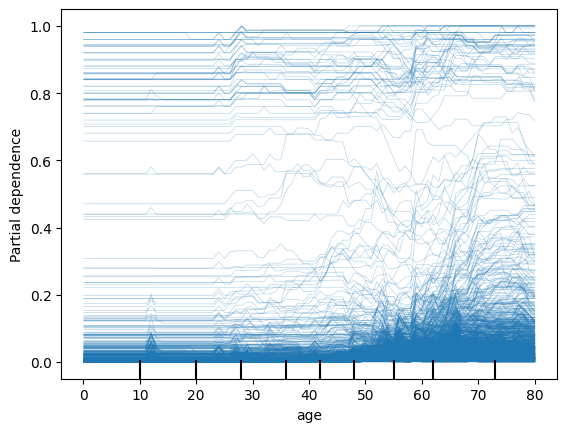

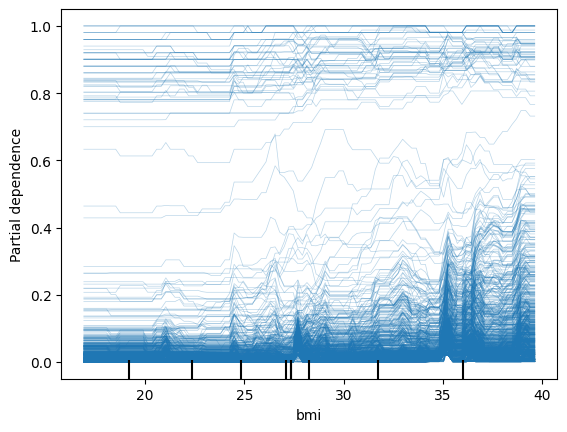

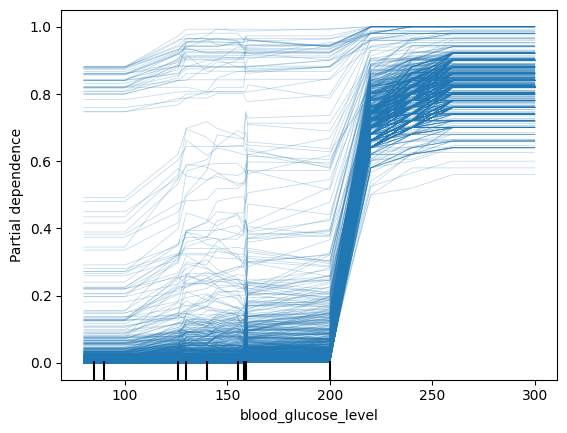

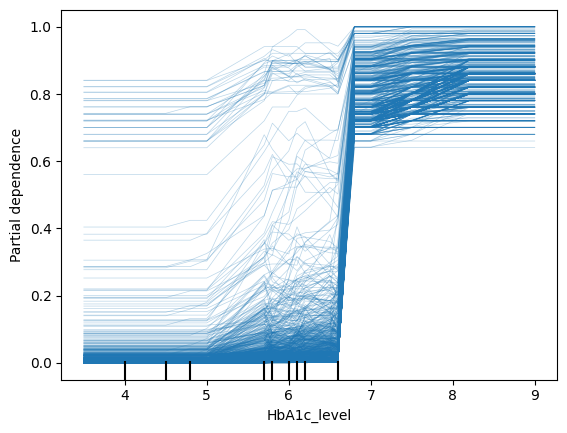

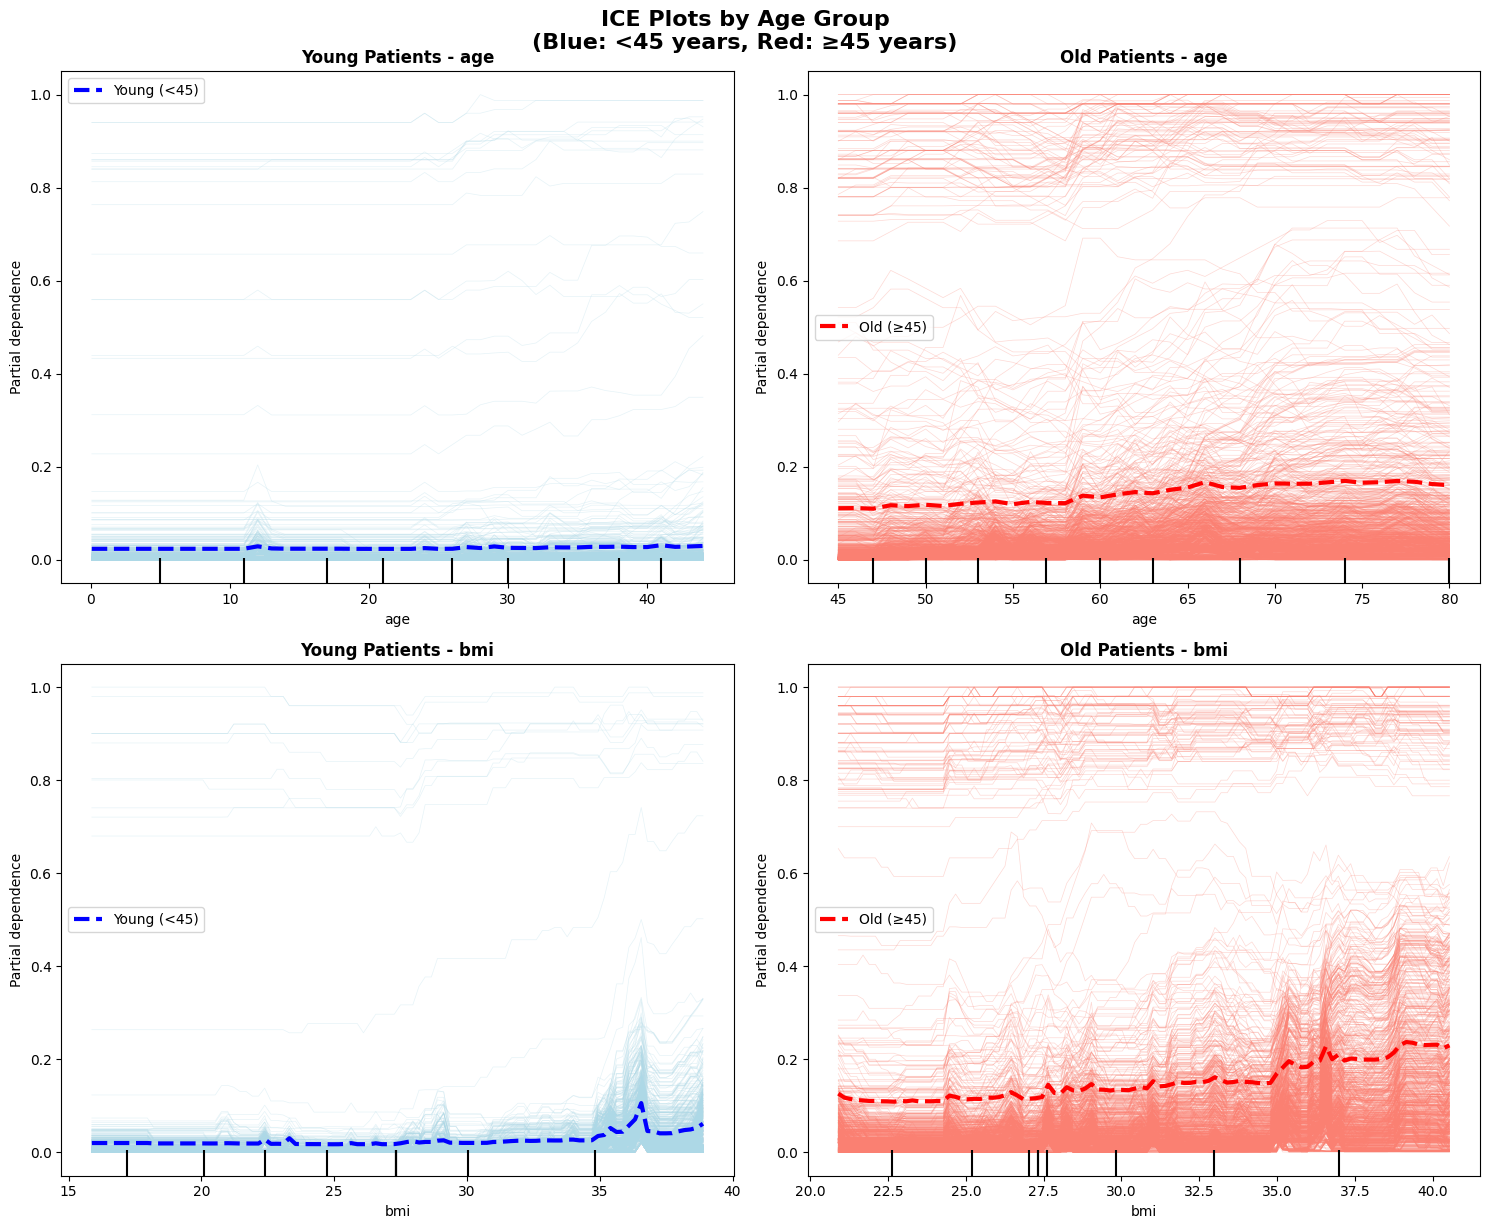


5. Clinical Insights from ICE Analysis:

🎯 Clinical Implications:
----------------------------------------

✅ ICE analysis completed successfully!


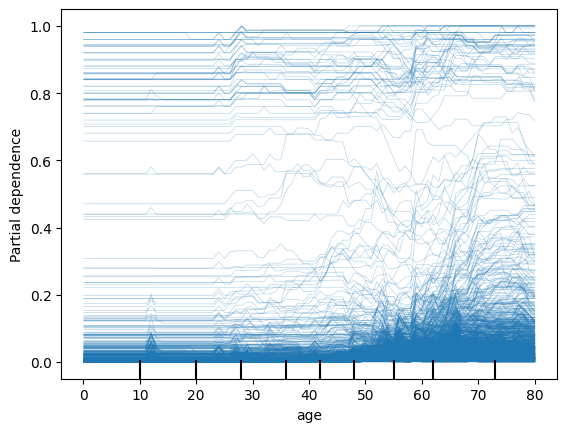

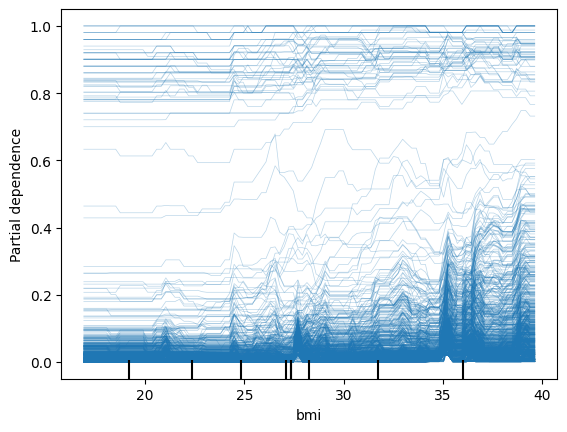

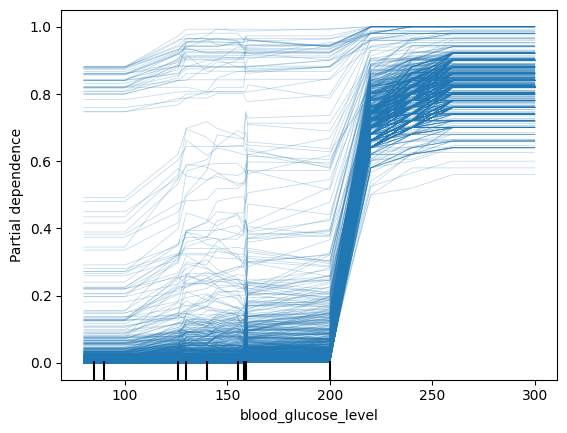

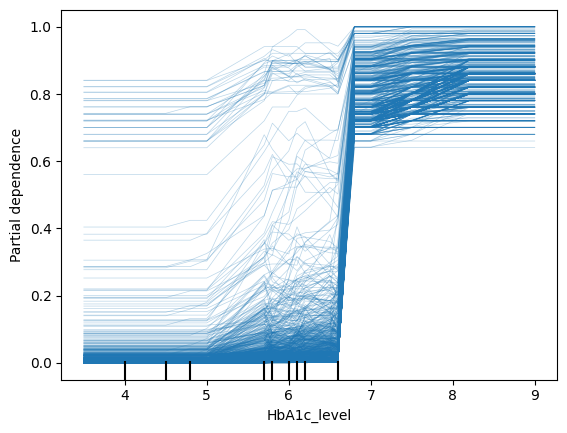

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

# Use smaller sample for faster execution
SAMPLE_SIZE = min(3000, len(df))
df = df.sample(n=SAMPLE_SIZE, random_state=42)

# Fast preprocessing
df_processed = df.copy()
df_processed['gender'] = df_processed['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
smoking_mapping = {'never': 0, 'No Info': 1, 'former': 2, 'not current': 3, 'ever': 4, 'current': 5}
df_processed['smoking_history'] = df_processed['smoking_history'].map(smoking_mapping)

X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10)
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")

# =============================================================================
# ICE PLOTS ONLY
# =============================================================================
print("\n" + "="*50)
print("INDIVIDUAL CONDITIONAL EXPECTATION (ICE) PLOTS")
print("="*50)

# Get feature importance to select most important features
feature_importance = model.feature_importances_
important_features_idx = np.argsort(feature_importance)[-4:]  # Top 4 features
important_features = [feature_names[i] for i in important_features_idx]

print(f"Analyzing ICE plots for top features: {important_features}")

# 1. Basic ICE Plots
print("\n1. Basic ICE Plots:")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        ax=axes[i],
        kind='both',  # Shows both ICE lines and PDP line
        ice_lines_kw={"color": "blue", "alpha": 0.2, "linewidth": 0.8},
        pd_line_kw={"color": "red", "linewidth": 3, "label": "Average (PDP)"},
        random_state=42
    )
    axes[i].set_title(f'ICE Plot - {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Diabetes Probability')
    axes[i].grid(True, alpha=0.3)

    # Add clinical thresholds
    if feature == 'HbA1c_level':
        axes[i].axvline(x=6.5, color='red', linestyle='--', alpha=0.7, label='Diabetes Threshold')
        axes[i].legend()
    elif feature == 'blood_glucose_level':
        axes[i].axvline(x=200, color='red', linestyle='--', alpha=0.7, label='High Glucose')
        axes[i].legend()
    elif feature == 'bmi':
        axes[i].axvline(x=30, color='red', linestyle='--', alpha=0.7, label='Obesity')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Individual Conditional Expectation (ICE) Plots\n(Blue: Individual patients, Red: Average effect)',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 2. Centered ICE Plots
print("\n2. Centered ICE Plots:")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        ax=axes[i],
        kind='both',
        centered=True,  # Center the ICE curves
        ice_lines_kw={"color": "blue", "alpha": 0.15, "linewidth": 0.7},
        pd_line_kw={"color": "red", "linewidth": 3, "label": "Average"},
        random_state=42
    )
    axes[i].set_title(f'Centered ICE Plot - {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Centered Diabetes Probability')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.suptitle('Centered ICE Plots\n(Effects relative to average prediction)',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 3. ICE Heterogeneity Analysis
print("\n3. ICE Heterogeneity Analysis:")

heterogeneity_analysis = {}

for feature in important_features:
    # Calculate ICE values manually to analyze heterogeneity
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        kind='individual', # Need individual plots to get ICE data
        random_state=42
    )

    # Access individual conditional expectation values
    if hasattr(pdp_display, 'individual_partial_dependence'):
        ice_values = pdp_display.individual_partial_dependence[0] # Access the values for the first (and only) target

        if ice_values.shape[0] > 1: # Check if there's more than one instance
            # Calculate variance of ICE curves across instances
            ice_variance = np.var(ice_values, axis=0).mean()

            # Classify heterogeneity
            if ice_variance > 0.01:
                heterogeneity_level = "HIGH heterogeneity"
            elif ice_variance > 0.001:
                heterogeneity_level = "MODERATE heterogeneity"
            else:
                heterogeneity_level = "LOW heterogeneity"

            heterogeneity_analysis[feature] = {
                'variance': ice_variance,
                'level': heterogeneity_level,
                'interpretation': "Patients respond differently" if ice_variance > 0.001 else "Consistent patient responses"
            }
        else:
             print(f"Warning: Not enough instances for feature '{feature}' to calculate heterogeneity.")
    else:
         print(f"Warning: Could not retrieve individual partial dependence data for feature '{feature}'.")


print("\n📊 ICE Heterogeneity Analysis:")
print("-" * 50)
for feature, analysis in heterogeneity_analysis.items():
    print(f"\n{feature}:")
    print(f"  Variance: {analysis['variance']:.6f}")
    print(f"  Level: {analysis['level']}")
    print(f"  Interpretation: {analysis['interpretation']}")

# 4. Subgroup ICE Analysis
print("\n4. Subgroup ICE Analysis:")

# Create subgroups based on age
young_patients = X_train[X_train['age'] < 45]
old_patients = X_train[X_train['age'] >= 45]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features[:2]):  # Only top 2 for clarity
    # Young patients
    PartialDependenceDisplay.from_estimator(
        model, young_patients, [feature],
        ax=axes[i*2],
        kind='both',
        ice_lines_kw={"color": 'lightblue', "alpha": 0.3, "linewidth": 0.5},
        pd_line_kw={"color": "blue", "linewidth": 3, "label": "Young (<45)"},
        random_state=42
    )
    axes[i*2].set_title(f'Young Patients - {feature}', fontweight='bold')
    axes[i*2].set_ylabel('Diabetes Probability')
    axes[i*2].grid(True, alpha=0.3)

    # Old patients
    PartialDependenceDisplay.from_estimator(
        model, old_patients, [feature],
        ax=axes[i*2+1],
        kind='both',
        ice_lines_kw={"color": 'salmon', "alpha": 0.3, "linewidth": 0.5},
        pd_line_kw={"color": "red", "linewidth": 3, "label": "Old (≥45)"},
        random_state=42
    )
    axes[i*2+1].set_title(f'Old Patients - {feature}', fontweight='bold')
    axes[i*2+1].set_ylabel('Diabetes Probability')
    axes[i*2+1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('ICE Plots by Age Group\n(Blue: <45 years, Red: ≥45 years)',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 5. Clinical Insights from ICE Plots
print("\n5. Clinical Insights from ICE Analysis:")

clinical_insights = {}

for feature in important_features:
    # Get ICE data for the feature
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_train, [feature],
        kind='individual',
        random_state=42
    )

    if hasattr(pdp_display, 'individual_partial_dependence'):
        ice_values = pdp_display.individual_partial_dependence[0] # Access the values for the first (and only) target

        if ice_values.shape[0] > 1: # Check if there's more than one instance
             # Calculate percentage of patients with increasing trend
            increasing_trends = 0
            total_patients = ice_values.shape[0]

            for i in range(total_patients):
                y_values = ice_values[i, :]
                if len(y_values) > 1:
                    # Get corresponding feature values for slope calculation
                    feature_values = pdp_display.feature_values[0]
                    if len(feature_values) > 1:
                        slope = (y_values[-1] - y_values[0]) / (feature_values[-1] - feature_values[0])
                        if slope > 0.001:  # Small threshold for increasing trend
                            increasing_trends += 1
                    else:
                        print(f"Warning: Not enough feature values for feature '{feature}' to calculate slope for instance {i}.")


            percent_increasing = (increasing_trends / total_patients) * 100

            clinical_insights[feature] = {
                'percent_increasing': percent_increasing,
                'trend_interpretation': f"{percent_increasing:.1f}% of patients show increasing risk with higher {feature}",
                'clinical_implication': "Important risk factor" if percent_increasing > 60 else "Variable impact"
            }
        else:
             print(f"Warning: Not enough instances for feature '{feature}' to calculate clinical insights.")
    else:
         print(f"Warning: Could not retrieve individual partial dependence data for feature '{feature}' for clinical insights.")


print("\n🎯 Clinical Implications:")
print("-" * 40)
for feature, insight in clinical_insights.items():
    print(f"\n{feature}:")
    print(f"  {insight['trend_interpretation']}")
    print(f"  Implication: {insight['clinical_implication']}")

print("\n✅ ICE analysis completed successfully!")

Dataset shape: (100000, 9)

First few rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender    

/tmp/ipython-input-2492883361.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed = df_processed.fillna(method='ffill')



Model Accuracy: 0.9705

Example 1
Actual diabetes status: 0
Original instance features:
  gender: 0.00
  age: 36.00
  hypertension: 0.00
  heart_disease: 0.00
  smoking_history: 3.00
  bmi: 22.64
  HbA1c_level: 6.00
  blood_glucose_level: 160.00

Counterfactual found in 1 iterations
Total change magnitude: 50.6797

Significant changes needed:
  age: 852.97 → 41.90 (change: -811.07)
  smoking_history: 5.68 → 2.76 (change: -2.91)
  bmi: 177.67 → 93.73 (change: -83.94)
  HbA1c_level: 11.95 → 8.74 (change: -3.21)
  blood_glucose_level: 6644.03 → 2171.19 (change: -4472.84)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


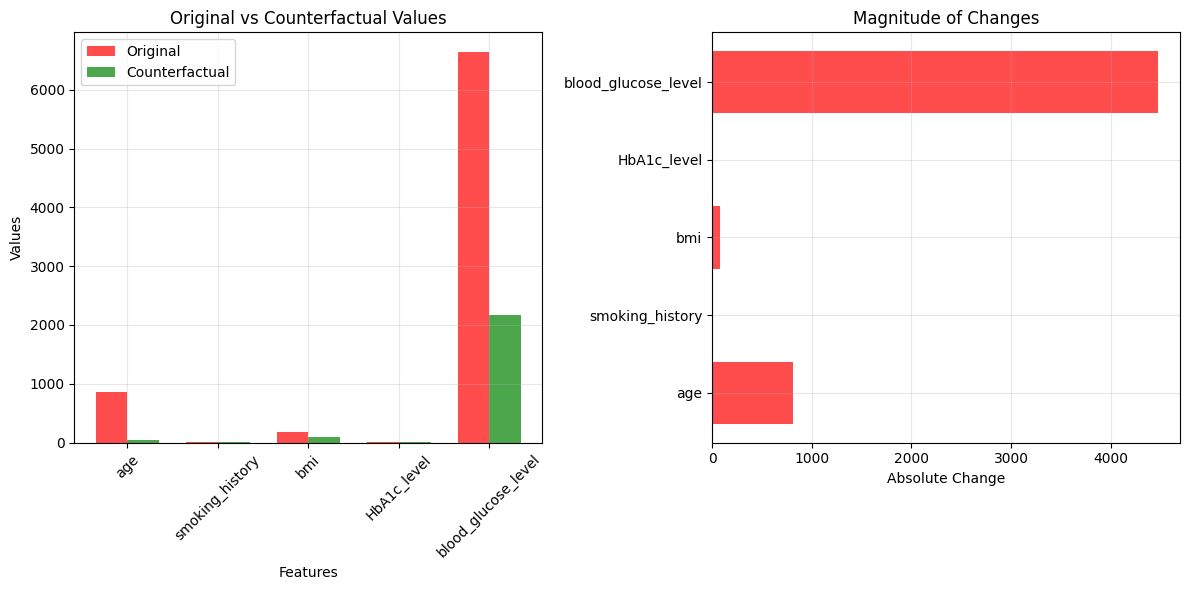


Example 2
Actual diabetes status: 0
Original instance features:
  gender: 0.00
  age: 31.00
  hypertension: 0.00
  heart_disease: 0.00
  smoking_history: 0.00
  bmi: 27.32
  HbA1c_level: 5.80
  blood_glucose_level: 126.00

Counterfactual found in 1 iterations
Total change magnitude: 51.3731

Significant changes needed:
  age: 740.32 → 41.90 (change: -698.42)
  bmi: 208.75 → 93.73 (change: -115.02)
  HbA1c_level: 11.74 → 8.74 (change: -3.00)
  blood_glucose_level: 5261.51 → 2171.19 (change: -3090.33)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


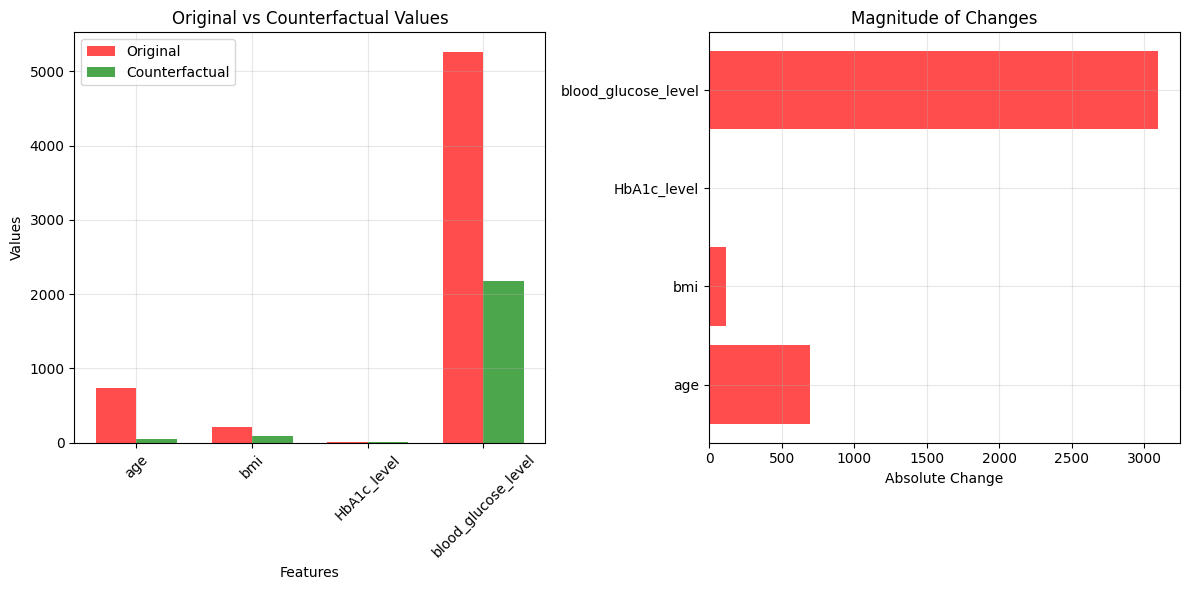


Example 3
Actual diabetes status: 0
Original instance features:
  gender: 1.00
  age: 52.00
  hypertension: 0.00
  heart_disease: 0.00
  smoking_history: 5.00
  bmi: 23.20
  HbA1c_level: 4.00
  blood_glucose_level: 100.00

Counterfactual found in 1 iterations
Total change magnitude: 52.2234

Significant changes needed:
  age: 1213.45 → 50.41 (change: -1163.04)
  smoking_history: 8.59 → 5.68 (change: -2.91)
  bmi: 181.39 → 93.73 (change: -87.66)
  HbA1c_level: 9.81 → 8.74 (change: -1.07)
  blood_glucose_level: 4204.30 → 2171.19 (change: -2033.11)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


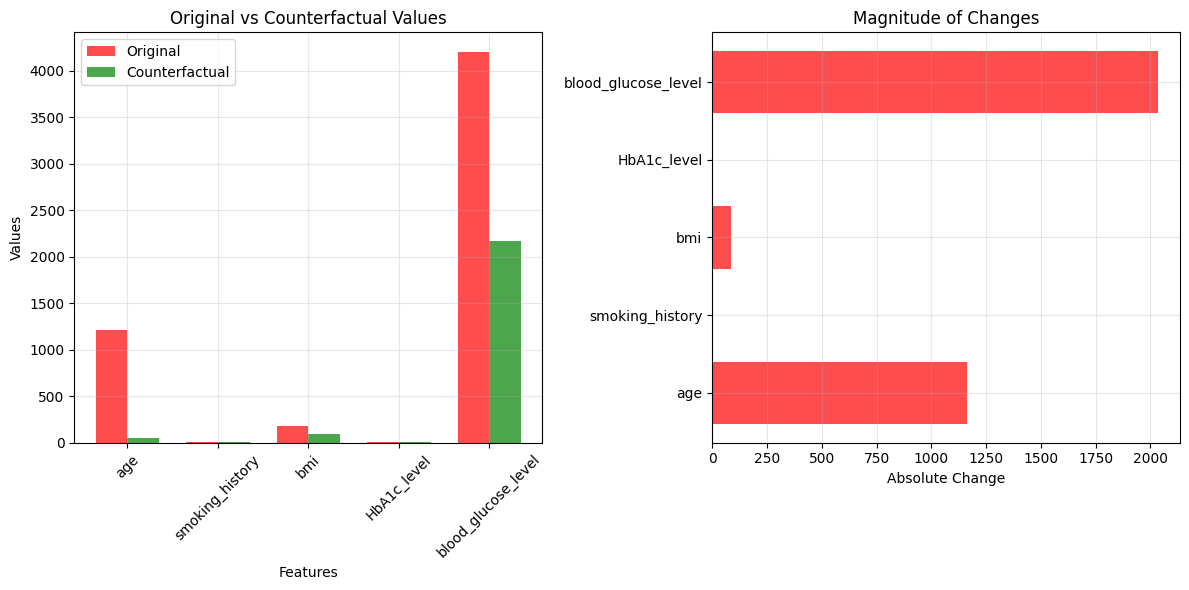


Counterfactual Change Analysis:
Most frequently changed features:
               Feature  Frequency  Avg_Magnitude
1                  age          3     890.844346
7  blood_glucose_level          3    3198.757930
6          HbA1c_level          3       2.426930
5                  bmi          3      95.540926
4      smoking_history          2       1.941284
3        heart_disease          0       0.000000
0               gender          0       0.000000
2         hypertension          0       0.000000


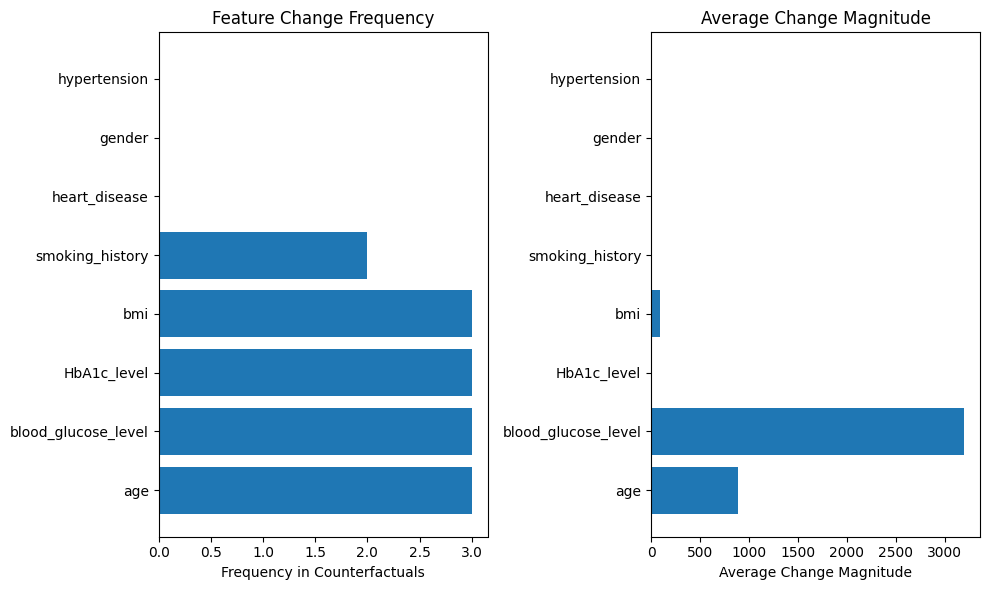


CUSTOM COUNTERFACTUAL GENERATION

Generating counterfactual for target class: 1
Custom input features:
  gender: 0
  age: 45.0
  hypertension: 0
  heart_disease: 0
  smoking_history: 2
  bmi: 25.0
  HbA1c_level: 5.5
  blood_glucose_level: 120

Counterfactual found!
Required changes:
  age: 1055.74 → 43.43 (change: -1012.31)
  smoking_history: 4.22 → 2.76 (change: -1.46)
  bmi: 193.34 → 93.73 (change: -99.61)
  HbA1c_level: 11.42 → 8.74 (change: -2.68)
  blood_glucose_level: 5017.54 → 2171.19 (change: -2846.35)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


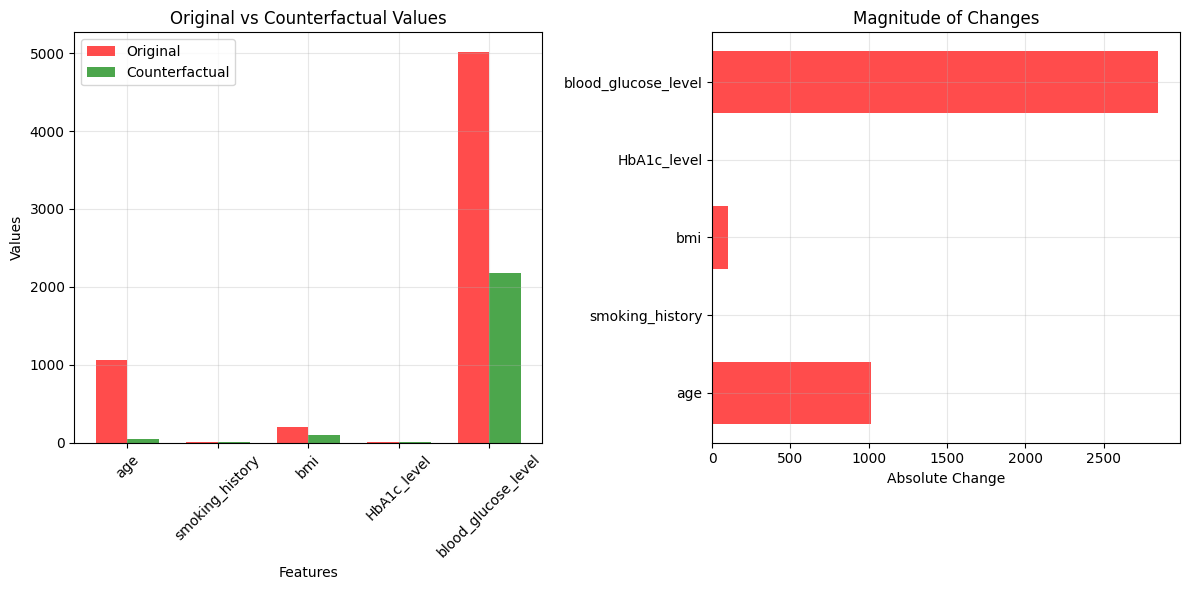

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget distribution:")
print(df['diabetes'].value_counts())

# Data preprocessing
def preprocess_data(df):
    df_processed = df.copy()

    # Handle gender (convert to binary: 0 for Female, 1 for Male)
    df_processed['gender'] = df_processed['gender'].map({'Female': 0, 'Male': 1})

    # Handle smoking_history (convert to numerical categories)
    smoking_mapping = {
        'never': 0,
        'No Info': 1,
        'current': 2,
        'former': 3,
        'ever': 4,
        'not current': 5
    }
    df_processed['smoking_history'] = df_processed['smoking_history'].map(smoking_mapping)

    # Fill any missing values (if they exist)
    df_processed = df_processed.fillna(method='ffill')

    return df_processed

# Preprocess the data
df_processed = preprocess_data(df)

# Prepare features and target
X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Counterfactual Explanation Class
class CounterfactualExplainer:
    def __init__(self, model, scaler, feature_names, categorical_features=None):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.categorical_features = categorical_features or []

        self.numerical_features = [f for f in feature_names if f not in self.categorical_features]

    def generate_counterfactual(self, instance, target_class=1, max_iterations=1000, step_size=0.1):
        """
        Generate counterfactual explanation for a given instance
        """
        # Convert instance to numpy array if needed
        if isinstance(instance, pd.Series):
            instance = instance.values.reshape(1, -1)

        # Get current prediction
        current_pred = self.model.predict(instance)[0]

        if current_pred == target_class:
            return instance.reshape(-1), "Instance already belongs to target class", 0

        counterfactual = instance.copy().astype(float)

        for iteration in range(max_iterations):
            # Add small perturbation
            perturbation = np.random.normal(0, step_size, counterfactual.shape)
            candidate = counterfactual + perturbation

            # Ensure categorical features remain valid (round to nearest integer)
            for i, feature in enumerate(self.feature_names):
                if feature in self.categorical_features:
                    candidate[0, i] = np.round(candidate[0, i])
                    # Ensure within valid range for categorical features
                    if feature == 'gender':
                        candidate[0, i] = np.clip(candidate[0, i], 0, 1)
                    elif feature == 'smoking_history':
                        candidate[0, i] = np.clip(candidate[0, i], 0, 5)

            # Ensure numerical features remain within reasonable bounds
            for i, feature in enumerate(self.feature_names):
                if feature in self.numerical_features:
                    if feature == 'age':
                        candidate[0, i] = np.clip(candidate[0, i], 0, 120)
                    elif feature == 'bmi':
                        candidate[0, i] = np.clip(candidate[0, i], 10, 70)
                    elif feature == 'HbA1c_level':
                        candidate[0, i] = np.clip(candidate[0, i], 3, 15)
                    elif feature == 'blood_glucose_level':
                        candidate[0, i] = np.clip(candidate[0, i], 50, 350)

            # Check prediction
            candidate_pred = self.model.predict(candidate)[0]

            if candidate_pred == target_class:
                changes = candidate - instance
                magnitude = np.linalg.norm(changes)
                return candidate.reshape(-1), changes.reshape(-1), magnitude, iteration + 1

            counterfactual = candidate

        return None, "Could not find counterfactual within iterations", max_iterations

    def explain(self, instance, target_class=1, feature_names=None):
        """
        Generate and display counterfactual explanation
        """
        if feature_names is None:
            feature_names = self.feature_names

        # Scale the instance
        instance_scaled = self.scaler.transform(instance.reshape(1, -1))

        counterfactual, changes, magnitude, iterations = self.generate_counterfactual(
            instance_scaled, target_class
        )

        if counterfactual is None:
            print(changes)
            return None

        # Inverse transform to original scale
        instance_original = self.scaler.inverse_transform(instance.reshape(1, -1))[0]
        counterfactual_original = self.scaler.inverse_transform(counterfactual.reshape(1, -1))[0]
        changes_original = counterfactual_original - instance_original

        # Create explanation
        explanation = {
            'original_instance': instance_original,
            'counterfactual_instance': counterfactual_original,
            'changes': changes_original,
            'magnitude': magnitude,
            'iterations': iterations
        }

        return explanation

    def plot_counterfactual(self, explanation, feature_names=None):
        """
        Plot the changes between original and counterfactual
        """
        if feature_names is None:
            feature_names = self.feature_names

        original = explanation['original_instance']
        counterfactual = explanation['counterfactual_instance']
        changes = explanation['changes']

        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'Feature': feature_names,
            'Original': original,
            'Counterfactual': counterfactual,
            'Change': changes
        })

        # Filter out features with zero change
        significant_changes = comparison_df[np.abs(comparison_df['Change']) > 0.01]

        if len(significant_changes) == 0:
            print("No significant changes found.")
            return

        # Plot changes
        plt.figure(figsize=(12, 6))

        # Plot 1: Feature values comparison
        plt.subplot(1, 2, 1)
        x_pos = np.arange(len(significant_changes))
        width = 0.35

        plt.bar(x_pos - width/2, significant_changes['Original'], width,
                label='Original', alpha=0.7, color='red')
        plt.bar(x_pos + width/2, significant_changes['Counterfactual'], width,
                label='Counterfactual', alpha=0.7, color='green')

        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.title('Original vs Counterfactual Values')
        plt.xticks(x_pos, significant_changes['Feature'], rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot 2: Magnitude of changes
        plt.subplot(1, 2, 2)
        colors = ['green' if x > 0 else 'red' for x in significant_changes['Change']]
        plt.barh(significant_changes['Feature'], np.abs(significant_changes['Change']),
                color=colors, alpha=0.7)
        plt.xlabel('Absolute Change')
        plt.title('Magnitude of Changes')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return significant_changes

# Initialize the counterfactual explainer
feature_names = X.columns.tolist()
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

explainer = CounterfactualExplainer(
    model=model,
    scaler=scaler,
    feature_names=feature_names,
    categorical_features=categorical_features
)

# Test with some instances from the test set
def test_counterfactual_explanations(explainer, X_test, y_test, num_examples=3):
    """
    Test counterfactual explanations on multiple examples
    """
    results = []

    for i in range(min(num_examples, len(X_test))):
        print(f"\n{'='*50}")
        print(f"Example {i+1}")
        print(f"{'='*50}")

        instance = X_test.iloc[i].values
        actual_label = y_test.iloc[i]

        print(f"Actual diabetes status: {actual_label}")
        print(f"Original instance features:")
        for j, (feature, value) in enumerate(zip(feature_names, instance)):
            print(f"  {feature}: {value:.2f}")

        # Generate counterfactual for the opposite class
        target_class = 1 if actual_label == 0 else 0

        explanation = explainer.explain(instance, target_class)

        if explanation:
            print(f"\nCounterfactual found in {explanation['iterations']} iterations")
            print(f"Total change magnitude: {explanation['magnitude']:.4f}")

            # Display significant changes
            print("\nSignificant changes needed:")
            for j, (feature, change) in enumerate(zip(feature_names, explanation['changes'])):
                if abs(change) > 0.01:  # Only show meaningful changes
                    original_val = explanation['original_instance'][j]
                    new_val = explanation['counterfactual_instance'][j]
                    print(f"  {feature}: {original_val:.2f} → {new_val:.2f} (change: {change:+.2f})")

            # Plot the changes
            significant_changes = explainer.plot_counterfactual(explanation)

            results.append({
                'instance_idx': i,
                'original_label': actual_label,
                'target_label': target_class,
                'explanation': explanation,
                'significant_changes': significant_changes
            })
        else:
            print("Could not find a counterfactual explanation")

    return results

# Run counterfactual explanations on test examples
results = test_counterfactual_explanations(explainer, X_test, y_test, num_examples=3)

# Additional analysis: Feature importance for counterfactuals
def analyze_counterfactual_patterns(results, feature_names):
    """
    Analyze which features are most frequently changed in counterfactuals
    """
    if not results:
        print("No results to analyze")
        return

    change_counts = {feature: 0 for feature in feature_names}
    change_magnitudes = {feature: 0 for feature in feature_names}

    for result in results:
        changes = result['explanation']['changes']
        for i, feature in enumerate(feature_names):
            if abs(changes[i]) > 0.01:  # Count only meaningful changes
                change_counts[feature] += 1
                change_magnitudes[feature] += abs(changes[i])

    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Feature': feature_names,
        'Frequency': [change_counts[f] for f in feature_names],
        'Avg_Magnitude': [change_magnitudes[f]/len(results) if len(results) > 0 else 0
                         for f in feature_names]
    })

    summary_df = summary_df.sort_values('Frequency', ascending=False)

    print("\nCounterfactual Change Analysis:")
    print("Most frequently changed features:")
    print(summary_df.head(10))

    # Plot feature importance in counterfactuals
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    top_features = summary_df.head(8)
    plt.barh(top_features['Feature'], top_features['Frequency'])
    plt.xlabel('Frequency in Counterfactuals')
    plt.title('Feature Change Frequency')

    plt.subplot(1, 2, 2)
    plt.barh(top_features['Feature'], top_features['Avg_Magnitude'])
    plt.xlabel('Average Change Magnitude')
    plt.title('Average Change Magnitude')

    plt.tight_layout()
    plt.show()

    return summary_df

# Analyze patterns across all counterfactuals
if results:
    feature_analysis = analyze_counterfactual_patterns(results, feature_names)

# Function to generate counterfactual for custom input
def generate_custom_counterfactual(explainer, custom_features, target_class=1):
    """
    Generate counterfactual for custom input features
    """
    print(f"\nGenerating counterfactual for target class: {target_class}")
    print("Custom input features:")
    for feature, value in zip(feature_names, custom_features):
        print(f"  {feature}: {value}")

    explanation = explainer.explain(np.array(custom_features), target_class)

    if explanation:
        print(f"\nCounterfactual found!")
        print("Required changes:")
        for i, (feature, change) in enumerate(zip(feature_names, explanation['changes'])):
            if abs(change) > 0.01:
                original_val = explanation['original_instance'][i]
                new_val = explanation['counterfactual_instance'][i]
                print(f"  {feature}: {original_val:.2f} → {new_val:.2f} (change: {change:+.2f})")

        explainer.plot_counterfactual(explanation)
        return explanation
    else:
        print("Could not find a counterfactual explanation")
        return None

# Example of custom counterfactual generation
print("\n" + "="*60)
print("CUSTOM COUNTERFACTUAL GENERATION")
print("="*60)

# Example custom instance (non-diabetic that we want to make diabetic)
custom_instance = [0, 45.0, 0, 0, 2, 25.0, 5.5, 120]  # Female, 45yo, non-smoker, etc.
custom_explanation = generate_custom_counterfactual(explainer, custom_instance, target_class=1)